<a href="https://colab.research.google.com/github/Quantum-Intelligence-Frontier/dldna/blob/main/notebooks/es/part_1/03_marco_de_aprendizaje_profundo.ipynb" target="_parent">
<img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Abrir en Colab"/>
</a>

# 3. Marco de aprendizaje profundo

> "La herramienta es tan buena como el que la hace." - *Anónimo, pero a menudo citado por von Neumann*

El desarrollo de los marcos en la historia del aprendizaje profundo ha sido muy importante. Después del éxito de AlexNet en 2012, han surgido varios marcos. A través de Caffe, Theano, Torch7 y otros, actualmente PyTorch y TensorFlow son los más utilizados.

A principios de la década de 2010, el aprendizaje profundo comenzó a mostrar resultados sorprendentes en varios campos, como el reconocimiento de imágenes y el reconocimiento de voz, superando las tecnologías existentes. Sin embargo, entrenar y desplegar modelos de aprendizaje profundo todavía era una tarea difícil. Esto se debía a que había que implementar directamente la configuración de redes neuronales, el cálculo de gradientes, la aceleración GPU y otros aspectos. Esta complejidad elevaba las barreras de entrada para la investigación en aprendizaje profundo y ralentizaba el ritmo de la investigación. Para abordar estos problemas, surgieron los marcos de aprendizaje profundo. Estos marcos proporcionan API de alto nivel y herramientas para construir, entrenar y desplegar modelos de redes neuronales, simplificando y acelerando el proceso de desarrollo. En sus primeras etapas, frameworks como Theano, Caffe y Torch se popularizaron y fueron ampliamente utilizados en la academia y la industria.

En 2015, Google lanzó TensorFlow como software de código abierto, lo que trajo grandes cambios al ecosistema de marcos de aprendizaje profundo. TensorFlow ganó rápidamente popularidad gracias a su arquitectura flexible, potentes herramientas de visualización y soporte para el entrenamiento distribuido a gran escala. En 2017, Facebook presentó PyTorch, estableciendo otro hito importante. PyTorch ofrecía un grafo de cálculo dinámico, una interfaz intuitiva y excelentes capacidades de depuración, lo que llevó a su rápida difusión entre los investigadores.

Actualmente, los marcos de aprendizaje profundo han trascendido el papel de simples herramientas para convertirse en infraestructura esencial para la investigación y desarrollo de aprendizaje profundo. Proporcionan funciones clave como diferenciación automática, aceleración GPU, paralelización de modelos y entrenamiento distribuido, acelerando así el desarrollo de nuevos modelos y algoritmos. Además, la competencia y colaboración entre los marcos están impulsando aún más el avance del ecosistema de aprendizaje profundo.


## 3.1 PyTorch

PyTorch es un marco de aprendizaje automático de código abierto basado en la biblioteca Torch, utilizado para aplicaciones como visión por computadora y procesamiento de lenguaje natural. Fue desarrollado como el marco principal por el laboratorio de investigación de IA de Facebook (FAIR) en 2016, reimplemementando Torch7 en Python. Debido a su grafo de cálculo dinámico y capacidades intuitivas de depuración, ganó rápidamente popularidad entre los investigadores. Aunque hay otros marcos como TensorFlow, JAX y Caffe, PyTorch se ha convertido en el estándar de facto en la investigación. Muchos nuevos modelos a menudo se lanzan con implementaciones de PyTorch.

Una vez que se es competente en un marco, también puede ser una buena estrategia aprovechar las ventajas de otros marcos. Por ejemplo, se pueden utilizar las pipelines de preprocesamiento de datos de TensorFlow o las transformaciones funcionales de JAX junto con PyTorch.

In [ ]:
!pip install dldna[colab] # in Colab
# !pip install dldna[all] # in your local

In [1]:
import torch

# Print PyTorch version
print(f"PyTorch version: {torch.__version__}")

# Set the random seed for reproducibility
torch.manual_seed(7)

PyTorch version: 2.6.0+cu124


Cuando se genera un número aleatorio, al configurar el valor inicial de la semilla se pueden obtener los mismos números aleatorios cada vez. Esto es comúnmente utilizado en la investigación para garantizar resultados consistentes en entrenamientos repetitivos.

### 3.1.1 Objeto Tensor

> **Desafío**: ¿Cómo se pueden realizar eficientemente operaciones de matrices a gran escala utilizando GPU?
>
> **Dilema del investigador**: A medida que el tamaño de los modelos de aprendizaje profundo aumentaba, aprender y hacer inferencia con solo CPU llevaba demasiado tiempo. Las GPU estaban especializadas en cálculos paralelos y eran adecuadas para el aprendizaje profundo, pero la programación de GPU era compleja y difícil. Se necesitaba una herramienta que abstrajera y automatizara las operaciones de GPU para que los investigadores de aprendizaje profundo pudieran utilizarlas fácilmente.

El tensor es la estructura de datos básica en PyTorch. Desde la aparición de CUDA en 2006, las operaciones de GPU se han convertido en el núcleo del aprendizaje profundo, y los tensores están diseñados para realizar estas operaciones de manera eficiente. Un tensor es un arreglo multidimensional que generaliza escalares, vectores y matrices. En el aprendizaje profundo, las dimensiones de los datos (rango del tensor) son muy variadas. Por ejemplo, una imagen se representa como un tensor de 4 dimensiones (lote, canal, altura, anchura), y el lenguaje natural se representa como un tensor de 3 dimensiones (lote, longitud de secuencia, dimensión de incrustación). Como se vio en el Capítulo 2, es importante poder transformar y procesar estas dimensiones con flexibilidad.

Puedes declarar un tensor de la siguiente manera.

In [2]:
import numpy as np
import torch

# Create a 3x2x4 tensor with random values
a = torch.Tensor(3, 2, 4)
print(a)

tensor([[[ 1.1210e-44,  0.0000e+00,  0.0000e+00,  4.1369e-41],
         [ 1.8796e-17,  0.0000e+00,  2.8026e-45,  0.0000e+00]],

        [[ 0.0000e+00,  0.0000e+00,         nan,         nan],
         [ 6.3058e-44,  4.7424e+30,  1.4013e-45,  1.3563e-19]],

        [[ 1.0089e-43,  0.0000e+00,  1.1210e-44,  0.0000e+00],
         [-8.8105e+09,  4.1369e-41,  1.8796e-17,  0.0000e+00]]])


También se pueden inicializar tensores a partir de datos existentes.

In [4]:
# From a Python list
d = [[1, 2], [3, 4]]
print(f"Type of d: {type(d)}")

a = torch.Tensor(d)  # Creates a *copy*
print(f"Tensor a:\n{a}")
print(f"Type of a: {type(a)}")

# From a NumPy array
d_np = np.array(d)
print(f"Type of d_np: {type(d_np)}")

b = torch.from_numpy(d_np) # Shares memory with d_np (zero-copy)
print(f"Tensor b (from_numpy):\n{b}")


c = torch.Tensor(d_np)  # Creates a *copy*
print(f"Tensor c (from np array using torch.Tensor):\n{c}")

# Example of memory sharing with torch.from_numpy
d_np[0, 0] = 100
print(f"Modified d_np:\n{d_np}")
print(f"Tensor b (from_numpy) after modifying d_np:\n{b}")
print(f"Tensor c (copy) after modifying d_np:\n{c}")

Type of d: <class 'list'>
Tensor a:
tensor([[1., 2.],
        [3., 4.]])
Type of a: <class 'torch.Tensor'>
Type of d_np: <class 'numpy.ndarray'>
Tensor b (from_numpy):
tensor([[1, 2],
        [3, 4]])
Tensor c (from np array using torch.Tensor):
tensor([[1., 2.],
        [3., 4.]])
Modified d_np:
[[100   2]
 [  3   4]]
Tensor b (from_numpy) after modifying d_np:
tensor([[100,   2],
        [  3,   4]])
Tensor c (copy) after modifying d_np:
tensor([[1., 2.],
        [3., 4.]])


No es lo mismo que se vean iguales cuando se imprimen. `d` es un objeto de lista de Python y los tensores pueden ser creados a partir de diversas estructuras de datos. La interacción con matrices NumPy es particularmente eficiente. Sin embargo, dado que los objetos de lista y las matrices NumPy no admiten GPU, la conversión a tensores es esencial para operaciones de gran escala. *Un punto importante* es entender la diferencia entre `torch.Tensor(data)` y `torch.from_numpy(data)`. El primero *siempre* crea una copia, mientras que el segundo crea una *vista* que comparte memoria con la matriz NumPy original (copia cero cuando sea posible). Si se modifica la matriz NumPy, también cambia el tensor creado por `from_numpy` y viceversa.

Hay muchas maneras de inicializar tensores. La importancia de los métodos de inicialización ha sido destacada desde el artículo de Hinton en 2006 y se han desarrollado diversas estrategias de inicialización. Las funciones básicas de inicialización son las siguientes:

*   `torch.zeros`: inicializa con ceros.
*   `torch.ones`: inicializa con unos.
*   `torch.rand`: inicializa con números aleatorios de una distribución uniforme entre 0 y 1.
*   `torch.randn`: inicializa con números aleatorios de una distribución normal estándar (media 0, varianza 1).
*   `torch.arange`: inicializa secuencialmente como n, n+1, n+2, ...

In [5]:
shape = (2, 3)

rand_t = torch.rand(shape)     # Uniform distribution [0, 1)
randn_t = torch.randn(shape)   # Standard normal distribution
ones_t = torch.ones(shape)
zeros_t = torch.zeros(shape)

print(f"Random tensor (uniform):\n{rand_t}")
print(f"Random tensor (normal):\n{randn_t}")
print(f"Ones tensor:\n{ones_t}")
print(f"Zeros tensor:\n{zeros_t}")

Random tensor (uniform):
tensor([[0.5349, 0.1988, 0.6592],
        [0.6569, 0.2328, 0.4251]])
Random tensor (normal):
tensor([[-1.2514, -1.8841,  0.4457],
        [-0.7068, -1.5750, -0.6318]])
Ones tensor:
tensor([[1., 1., 1.],
        [1., 1., 1.]])
Zeros tensor:
tensor([[0., 0., 0.],
        [0., 0., 0.]])


PyTorch admite más de 100 operaciones de tensor, y todas ellas pueden ejecutarse en GPU. Los tensores se crean básicamente en la memoria de CPU, por lo que para usar GPU, es necesario moverlos explícitamente usando la función `to()`. Mover tensores grandes entre CPU y GPU tiene un costo considerable, por lo que una gestión cuidadosa de la memoria es esencial. En el entrenamiento de deep learning práctico, el ancho de banda de memoria de la GPU tiene un impacto decisivo en el rendimiento. Por ejemplo, al entrenar modelos de transformador, cuanto mayor sea la memoria de GPU, más grande será el tamaño del lote que se puede usar, lo que mejora la eficiencia del entrenamiento. Sin embargo, la memoria de alta banda es muy costosa de producir y constituye una parte significativa del precio de la GPU. La diferencia en rendimiento entre las operaciones de tensor de CPU y GPU es particularmente notable en operaciones que se pueden paralelizar, como la multiplicación de matrices. Por esta razón, en el deep learning moderno son esenciales los aceleradores dedicados como GPU, TPU, NPU.

In [6]:
# Device setting
if torch.cuda.is_available():
    tensor = zeros_t.to("cuda")
    device = "cuda:0"
else:
    device = "cpu"
    print('GPU not available')

# CPU/GPU performance comparison
import time

# CPU operation
x = torch.rand(10000, 10000)
start = time.time()
torch.matmul(x, x)
cpu_time = time.time() - start
print(f"CPU computation time = {cpu_time:3.2f} seconds")

# GPU operation
if device != "cpu":
    x = x.to(device)
    start = torch.cuda.Event(enable_timing=True)
    end = torch.cuda.Event(enable_timing=True)

    start.record()
    torch.matmul(x, x)
    end.record()
    torch.cuda.synchronize()  # Wait for all operations to complete
    gpu_time = start.elapsed_time(end) / 1000  # Convert milliseconds to seconds
    print(f"GPU computation time = {gpu_time:3.2f} seconds")
    print(f"GPU is {cpu_time / gpu_time:3.1f} times faster.")

CPU computation time = 2.34 seconds
GPU computation time = 0.14 seconds
GPU is 16.2 times faster.


La conversión entre NumPy y tensores se implementa de manera muy eficiente. En particular, como vimos anteriormente, al usar `torch.from_numpy()`, la memoria se comparte sin necesidad de copiarla.

In [7]:
np_a = np.array([[1, 1], [2, 3]])
tensor_a = torch.from_numpy(np_a)
np_b = tensor_a.numpy() # Shares memory.  If tensor_a is on CPU.

print(f"NumPy array: {np_a}")
print(f"Tensor: {tensor_a}")
print(f"NumPy array from Tensor: {np_b}") #if tensor_a is on CPU.

NumPy array: [[1 1]
 [2 3]]
Tensor: tensor([[1, 1],
        [2, 3]])
NumPy array from Tensor: [[1 1]
 [2 3]]


Cuando se convierte un tensor a NumPy, el tensor debe estar en la CPU. Si el tensor está en la GPU, primero debe moverse a la CPU usando `.cpu()`. Las propiedades básicas de un tensor son `shape`, `dtype`, `device`, y a través de estas se puede verificar la forma del tensor y su ubicación de almacenamiento.

In [18]:
a = torch.rand(2, 3)
print(f"Shape = {a.shape}")
print(f"Data type = {a.dtype}")
print(f"Device = {a.device}")

Shape = torch.Size([2, 3])
Data type = torch.float32
Device = cpu


El indexado y el slicing utilizan la misma sintaxis que NumPy.

In [19]:
a = torch.rand(3, 3)
print(f"Tensor a:\n{a}")
print(f"First row: {a[0]}")
print(f"First column: {a[:, 0]}")
print(f"Last column: {a[..., -1]}")  # Equivalent to a[:, -1]

Tensor a:
tensor([[0.2069, 0.8296, 0.4973],
        [0.9265, 0.8386, 0.6611],
        [0.5329, 0.7822, 0.0975]])
First row: tensor([0.2069, 0.8296, 0.4973])
First column: tensor([0.2069, 0.9265, 0.5329])
Last column: tensor([0.4973, 0.6611, 0.0975])


### 3.1.2 Operaciones

PyTorch admite casi todas las operaciones de NumPy. La tradición de operaciones en matrices multidimensionales, que comenzó con el lenguaje APL en 1964, se ha transmitido a través de NumPy hasta PyTorch. Puede consultar la lista completa de operaciones soportadas en la documentación oficial de PyTorch ([documentación de PyTorch]([https://pytorch.org/docs/stable/tensors.html)).

El cambio de forma de tensores es una de las operaciones más frecuentemente utilizadas en redes neuronales. Se puede cambiar la dimensión de un tensor mediante la función `view()`, manteniendo el número total de elementos. La función `permute()` reordena las dimensiones.

In [20]:
a = torch.arange(12)
print(f"a: {a}")

x = a.view(3, 4)  # Reshape to 3x4
print(f"x: {x}")

y = x.permute(1, 0)  # Swap dimensions 0 and 1
print(f"y: {y}")

b = torch.randn(2, 3, 5)
print(f"b shape: {b.shape}")

z = b.permute(2, 0, 1)  # Change dimension order to (2, 0, 1)
print(f"z shape: {z.shape}")

a: tensor([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])
x: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
y: tensor([[ 0,  4,  8],
        [ 1,  5,  9],
        [ 2,  6, 10],
        [ 3,  7, 11]])
b shape: torch.Size([2, 3, 5])
z shape: torch.Size([5, 2, 3])


Las operaciones de matriz son fundamentales en el aprendizaje profundo, y PyTorch proporciona varias funciones para operaciones con matrices.

1.  `torch.matmul`: realiza operaciones de matriz generales. Dependiendo de las dimensiones, funciona de la siguiente manera.
    *   1D × 1D: producto escalar (dot product)
    *   2D × 2D: multiplicación de matrices
    *   1D × 2D: agrega una dimensión a la primera matriz y luego realiza la multiplicación de matrices
    *   N-D × M-D: realiza broadcasting y luego la multiplicación de matrices
2.  `torch.mm`: operación de multiplicación de matrices pura (sin soporte para broadcasting)
3.  `torch.bmm`: multiplicación de matrices con dimensión de lote ((b, i, k) × (b, k, j) → (b, i, j))
4.  `torch.einsum`: operaciones de tensores usando la notación de suma de Einstein. Permite expresar operaciones de tensores complejas de manera concisa. (Consulte "Teoría Profunda" para más detalles)
    -   `torch.einsum('ij,jk->ik', a, b)`: producto de las matrices a y b

In [21]:
a = torch.arange(6)
b = torch.arange(12)

X = a.view(2, 3)
Y = b.view(3, 4)
print(f"X: {X}")
print(f"Y: {Y}")

# matmul (2,3) X (3,4) -> (2, 4)
print(f"X @ Y = {torch.matmul(X, Y)}")

# Using torch.einsum for matrix multiplication
einsum_result = torch.einsum('ij,jk->ik', X, Y)
print(f"X @ Y (using einsum) = {einsum_result}")


a = torch.arange(2)
b = torch.arange(2)
print(f"a: {a}")
print(f"b: {b}")

# Vector x Vector operation
print(f"a @ b = {torch.matmul(a, b)}")

# 1D tensor (vector), 2D tensor (matrix) operation
# (2) x (2,2) is treated as (1,2) x (2,2) for matrix multiplication.
# Result: (1,2) x (2,2) -> (1,2)
b = torch.arange(4)
B = b.view(2, 2)
print(f"a: {a}")
print(f"B: {B}")
print(f"a @ B = {torch.matmul(a, B)}")

# Matrix x Vector operation
X = torch.randn(3, 4)
b = torch.randn(4)
print(f"X @ b shape = {torch.matmul(X, b).size()}")

# Batched matrix x Batched matrix
# The leading batch dimension is maintained.
# The 2nd and 3rd dimensions are treated as matrices for multiplication.
X = torch.arange(18).view(3, 2, 3)
Y = torch.arange(18).view(3, 3, 2)
print(f"X: {X}")
print(f"Y: {Y}")
# Batch dimension remains the same, and (2,3)x(3,2) -> (2,2)
print(f"X @ Y shape: {torch.matmul(X, Y).size()}")
print(f"X @ Y: {torch.matmul(X, Y)}")

# Batched matrix x Broadcasted matrix
X = torch.arange(18).view(3, 2, 3)
Y = torch.arange(6).view(3, 2)
print(f"X: {X}")
print(f"Y: {Y}")
# The second matrix lacks a batch dimension.
# It's broadcasted to match the batch dimension of the first matrix (repeated 3 times).
print(f"X @ Y shape: {torch.matmul(X, Y).size()}")
print(f"X @ Y: {torch.matmul(X, Y)}")


# Using torch.einsum for matrix multiplication
X = torch.arange(6).view(2, 3)
Y = torch.arange(12).view(3, 4)
einsum_result = torch.einsum('ij,jk->ik', X, Y)  # Equivalent to torch.matmul(X, Y)
print(f"X @ Y (using einsum) = {einsum_result}")

X: tensor([[0, 1, 2],
        [3, 4, 5]])
Y: tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
X @ Y = tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
X @ Y (using einsum) = tensor([[20, 23, 26, 29],
        [56, 68, 80, 92]])
a: tensor([0, 1])
b: tensor([0, 1])
a @ b = 1
a: tensor([0, 1])
B: tensor([[0, 1],
        [2, 3]])
a @ B = tensor([2, 3])
X @ b shape = torch.Size([3])
X: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 9, 10, 11]],

        [[12, 13, 14],
         [15, 16, 17]]])
Y: tensor([[[ 0,  1],
         [ 2,  3],
         [ 4,  5]],

        [[ 6,  7],
         [ 8,  9],
         [10, 11]],

        [[12, 13],
         [14, 15],
         [16, 17]]])
X @ Y shape: torch.Size([3, 2, 2])
X @ Y: tensor([[[ 10,  13],
         [ 28,  40]],

        [[172, 193],
         [244, 274]],

        [[550, 589],
         [676, 724]]])
X: tensor([[[ 0,  1,  2],
         [ 3,  4,  5]],

        [[ 6,  7,  8],
         [ 

`torch.einsum` utiliza la notación de Einstein para expresar operaciones de tensores. `'ij,jk->ik'` significa que se deben multiplicar las dimensiones `(i, j)` del tensor `X` con las dimensiones `(j, k)` del tensor `Y` para generar un resultado de dimensión `(i, k)`. Esto produce el mismo resultado que la multiplicación de matrices `torch.matmul(X, Y)`. `einsum` también admite varias otras operaciones, incluyendo transposición, suma, producto interno, producto externo y multiplicación de matrices por lotes. Para más detalles, consulte la documentación de PyTorch.

In [22]:
# Other einsum examples

# Transpose
a = torch.randn(2, 3)
b = torch.einsum('ij->ji', a)  # Swap dimensions

# Sum of all elements
a = torch.randn(2, 3)
b = torch.einsum('ij->', a)  # Sum all elements

# Batch matrix multiplication
a = torch.randn(3, 2, 5)
b = torch.randn(3, 5, 3)
c = torch.einsum('bij,bjk->bik', a, b) # Batch matrix multiplication

::: {.callout-note collapse="true" title="Haga clic para ver el contenido (análisis detallado: notación de Einstein y torch.einsum)"}
## Notación de Einstein y torch.einsum

### Notación de Einstein (Einstein Notation)

La notación de Einstein (o Convención de Suma de Einstein) es un método de notación introducido por Albert Einstein en 1916 para describir la teoría general de la relatividad. Originalmente se diseñó para simplificar las expresiones matemáticas en física, especialmente en la teoría de la relatividad, pero gracias a su comodidad y expresividad, es ampliamente utilizada en diversos campos que manejan operaciones con tensores.

**Idea central:**

  * **Los índices repetidos implican suma:** cuando un índice aparece dos veces en un término, se implica que se suman todos los valores posibles de ese índice. Se omite el símbolo de suma explícito ($\sum$) para simplificar la notación.
  * **Índices libres y ficticios:**
      * **Índice libre (free index):** índice que aparece en el tensor resultante. Aparece una vez por término.
      * **Índice ficticio (dummy index):** índice sobre el cual se realiza la suma. Aparece dos veces en un término. (índice de suma, índice ligado)

**Reglas básicas**

1.  **Si un mismo índice aparece dos veces en un término, se suman los valores correspondientes a ese índice.**
2.  **Los índices libres determinan las dimensiones del tensor resultante.**
3.  **Los índices ficticios solo se utilizan para cálculos internos y no aparecen en el resultado.**
4.  **Las letras de los índices pueden elegirse arbitrariamente, pero es recomendable mantener la consistencia para evitar confusiones.** (por convención se usan $i, j, k, l, m, n$)
5.  **La flecha ($\rightarrow$) a la izquierda** representa los tensores de entrada, y **a la derecha** el tensor de salida.

**Ejemplos**

  * **Producto escalar (dot product):** $a_i b_i$ (equivalente a $\sum_i a_i b_i$)
  * **Multiplicación de matrices (matrix multiplication):** $A_{ij} B_{jk} = C_{ik}$ (equivalente a $\sum_j A_{ij}B_{jk}$)
  * **Transposición (transpose):** $A_{ij} = B_{ji}$ (B es la transpuesta de A)
  * **Traza (trace):** $A_{ii}$ (equivalente a $\sum_i A_{ii}$)
  * **Producto exterior (outer product):** $a_i b_j = C_{ij}$
  * **Multiplicación elemento por elemento (element-wise multiplication):** $A_{ij}B_{ij} = C_{ij}$ (producto de Hadamard)

**Ejemplos de uso en deep learning**
* **Multiplicación de matrices por lotes (batched matrix multiplication):** $A\_{bij} B\_{bjk} = C\_{bik}$ ($b$: dimensión del lote)
  * **Mecanismo de atención (attention mechanism):** $e\_{ij} = Q\_{ik} K\_{jk}$, $a\_{ij} = \text{softmax}(e\_{ij})$, $v\_{i} = a\_{ij} V\_{j}$ ($Q$: consulta, $K$: clave, $V$: valor)
  * **Transformación bilineal (bilinear transformation):** $x\_i W\_{ijk} y\_j = z\_k$
  * **Convolución multidimensional (convolution):** $I\_{b,c,i,j} \* F\_{o,c,k,l} = O\_{b,o,i',j'}$ ($b$: lote, $c$: canales de entrada, $o$: canales de salida, $i, j$: dimensiones espaciales de entrada, $k, l$: dimensiones espaciales del filtro)
  * **Normalización por lotes (Batch Normalization):** $\gamma\_c \* \frac{x\_{b,c,h,w} - \mu\_c}{\sigma\_c} + \beta\_c$ ($c$: dimensión de canal, $b$: lote, $h$: altura, $w$: anchura)
  * **Actualización del estado oculto de RNN**: $h\_t = \tanh(W\_{ih}x\_t + b\_{ih} + W\_{hh}h\_{t-1} + b\_{hh})$ ($h$: oculto, $x$: entrada, $W$: peso, $b$: sesgo)
  * **Actualización del estado de celda de LSTM**: $c\_t = f\_t \* c\_{t-1} + i\_t \* \tilde{c}\_t$ ($c$: estado de celda, $f$: puerta de olvido, $i$: puerta de entrada, $\tilde{c}\_t$: estado de celda candidato)

### torch.einsum

`torch.einsum` es una función en PyTorch que realiza operaciones de tensores utilizando la notación de Einstein. `einsum` es el acrónimo de "Einstein summation".

**Uso:**

```python
torch.einsum(equation, *operands)
```

  * `equation`: cadena de caracteres en notación de Einstein. Tiene forma `'ij,jk->ik'`.
  * `*operands`: tensores que participan en la operación (argumentos variables).

**Ventajas**

  * **Concisión:** permite expresar operaciones complejas de tensores en una sola línea de código.
  * **Legibilidad:** la notación de Einstein clarifica el significado de las operaciones de tensores.
  * **Flexibilidad:** facilita combinar diversas operaciones de tensores para definir nuevas operaciones.
  * **Optimización:** PyTorch optimiza automáticamente las operaciones `einsum` para realizar cálculos eficientes. Puede ser más rápido que operaciones implementadas manualmente, utilizando rutinas optimizadas de bibliotecas como BLAS, cuBLAS y ajustando el orden de las operaciones.
  * **Compatibilidad con diferenciación automática**: las operaciones definidas con `einsum` son completamente compatibles con el sistema de diferenciación automática de PyTorch.

**Ejemplos de torch.einsum:**

```python
import torch

# Multiplicación de matrices
A = torch.randn(3, 4)
B = torch.randn(4, 5)
C = torch.einsum('ij,jk->ik', A, B)  # C = A @ B

# Transposición
A = torch.randn(3, 4)
B = torch.einsum('ij->ji', A)  # B = A.T

# Suma de la diagonal
A = torch.randn(3, 3)
trace = torch.einsum('ii->', A)  # trace = torch.trace(A)
```
# multiplicación de matrices por lotes
A = torch.randn(2, 3, 4)
B = torch.randn(2, 4, 5)
C = torch.einsum('bij,bjk->bik', A, B) # C = torch.bmm(A, B)

# producto exterior
a = torch.randn(3)
b = torch.randn(4)
C = torch.einsum('i,j->ij', a, b) # C = torch.outer(a, b)

# multiplicación elemento por elemento
A = torch.randn(2,3)
B = torch.randn(2,3)
C = torch.einsum('ij,ij->ij', A, B) # C = A * B

# transformación bilineal
x = torch.randn(3)
W = torch.randn(5, 3, 4)
y = torch.randn(4)
z = torch.einsum('i,ijk,j->k', x, W, y) # z_k = sum_i sum_j x_i * W_{ijk} * y_j

# reducción de tensores multidimensionales
tensor = torch.randn(3, 4, 5, 6)
result = torch.einsum('...ij->...i', tensor)  # suma sobre las últimas dos dimensiones
```

**`torch.einsum` vs. otros operadores:**

| Operación               | `torch.einsum`           | Otros métodos                                   |
| :---------------------- | :----------------------- | :------------------------------------------ |
| multiplicación de matrices | `'ij,jk->ik'`           | `torch.matmul(A, B)` o `A @ B`          |
| transposición            | `'ij->ji'`               | `torch.transpose(A, 0, 1)` o `A.T`        |
| traza                    | `'ii->'`                 | `torch.trace(A)`                            |
| multiplicación de matrices por lotes | `'bij,bjk->bik'`        | `torch.bmm(A, B)`                           |
| producto interno         | `'i,i->'`                | `torch.dot(a, b)`                            |
| producto exterior        | `'i,j->ij'`              | `torch.outer(a, b)`                          |
| multiplicación elemento por elemento | `'ij,ij->ij'`          | `A * B`                                      |
| reducción de tensores (sum, mean, etc.) | `'ijk->i'` (ejemplo)      | `torch.sum(A, dim=(1, 2))`                   |

**Limitaciones de `torch.einsum`**

  * **Curva de aprendizaje inicial:** Para usuarios no familiarizados con la notación de Einstein, puede ser un poco difícil al principio.
  * **Legibilidad en operaciones complejas:** En casos muy complejos, la cadena `einsum` puede volverse larga y menos legible. En estos casos, es recomendable dividir la operación en varios pasos o utilizar comentarios.
  * **Imposibilidad de expresar todas las operaciones:** Dado que `einsum` se basa en operaciones de álgebra lineal, no se pueden expresar directamente operaciones no lineales (por ejemplo: `max`, `min`, `sort`) ni operaciones condicionales. En estos casos, es necesario usar otras funciones de PyTorch.

**Optimización de `einsum` (`torch.compile`)**
`torch.compile` (PyTorch 2.0 o superior) puede optimizar aún más las operaciones `einsum`. `compile` realiza diversas optimizaciones a través de la compilación JIT (Just-In-Time), analizando el código, fusionando operaciones de tensores y optimizando patrones de acceso a memoria.

```python
import torch
# Disponible en PyTorch 2.0 o superior

@torch.compile
def my_einsum_function(a, b):
    return torch.einsum('ij,jk->ik', a, b)

# Se compila al llamar por primera vez, y se ejecuta el código optimizado en llamadas posteriores
result = my_einsum_function(torch.randn(10, 20), torch.randn(20, 30))

```

**Conclusión:**

La notación de Einstein y `torch.einsum` son herramientas poderosas para expresar y calcular operaciones tensoriales complejas en el aprendizaje profundo de manera concisa y eficiente. Aunque puede parecer extraño al principio, una vez que te familiarices con ellas, puedes mejorar significativamente la legibilidad y eficiencia del código. En particular, cuando se trata de modelos de aprendizaje profundo complejos como los modelos Transformer, donde hay muchas operaciones tensoriales, su valor es evidente. Usarlas junto con `torch.compile` puede mejorar aún más el rendimiento.

**Referencias:**

1.  **Notación de Einstein:** [https://en.wikipedia.org/wiki/Einstein\_notation](https://www.google.com/url?sa=E&source=gmail&q=https://en.wikipedia.org/wiki/Einstein_notation)
2.  **Documentación de `torch.einsum`:** [https://pytorch.org/docs/stable/generated/torch.einsum.html](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/docs/stable/generated/torch.einsum.html)
3.  **Introducción básica a NumPy's einsum:** [https://ajcr.net/Basic-guide-to-einsum/](https://www.google.com/url?sa=E&source=gmail&q=https://ajcr.net/Basic-guide-to-einsum/)
4.  **Einsum is All You Need - Einstein Summation in Deep Learning:** [https://rockt.github.io/2018/04/30/einsum](https://www.google.com/url?sa=E&source=gmail&q=https://rockt.github.io/2018/04/30/einsum)
:::

### 3.1.3 Grafo de cálculo para operaciones de gradiente

La diferenciación automática (Automatic Differentiation) se ha estado investigando desde la década de 1970, pero ha recibido mucha atención desde el desarrollo del aprendizaje profundo después de 2015. PyTorch implementa la diferenciación automática a través de grafos de cálculo dinámicos (dynamic computation graph), lo cual es una implementación práctica de la regla de la cadena (chain rule) que se examinó en el Capítulo 2.

La diferenciación automática de PyTorch puede rastrear y almacenar los gradientes en cada paso de cálculo. Para esto, es necesario declarar explícitamente el seguimiento de gradientes en los tensores.

In [23]:
a = torch.randn((2,))
print(f"a.requires_grad (default): {a.requires_grad}")  # False (default)

a.requires_grad_(True)  # In-place modification
print(f"a.requires_grad (after setting to True): {a.requires_grad}")  # True

# Declare during creation
x = torch.arange(2, dtype=torch.float32, requires_grad=True)
print(f"x.requires_grad (declared at creation): {x.requires_grad}")

a.requires_grad (default): False
a.requires_grad (after setting to True): True
x.requires_grad (declared at creation): True


Por ejemplo, consideremos la siguiente función de pérdida simple. (Figura 3-1, ver versión anterior)

$$y = \frac {1}{N}\displaystyle\sum_{i}^{N} \{(x_i - 1)^2 + 4) \}$$

Las operaciones sobre $x_i$ pueden expresarse secuencialmente como $a_i = x_i - 1$, $b_i = a_i^2$, $c_i = b_i + 4$, $y = \frac{1}{N}\sum_{i=1}^{N} c_i$. 

Vamos a realizar las operaciones en la dirección forward y backward para esta ecuación.

In [24]:
a = x - 1
b = a**2
c = b + 4
y = c.mean()

print(f"y = {y}")

# Perform backward operation
y.backward()

# Print the gradient of x (x.grad)
print(f"x.grad = {x.grad}")

y = 4.5
x.grad = tensor([-1.,  0.])


La traducción del texto es la siguiente:

Calcular las gradientes de cada paso mediante fórmulas se muestra a continuación.

$\frac{\partial a_i}{\partial x_i} = 1, \frac{\partial b_i}{\partial a_i} = 2 \cdot a_i, \frac{\partial c_i}{\partial b_i} = 1,  \frac{\partial y}{\partial c_i} = \frac{1}{N}$

Por lo tanto, por la regla de la cadena:

$\frac{\partial y}{\partial x_i} = \frac{\partial y}{\partial  c_i}\frac{\partial c_i}{\partial b_i}\frac{\partial b_i}{\partial a_i}\frac{\partial a_i}{\partial x_i} =  \frac{1}{N} \cdot 1 \cdot 2 \cdot a_i \cdot 1 = \frac{2}{N}a_i = \frac{2}{N}(x_i - 1)$

Dado que $x_i$ está en el intervalo \[0, 1] y N=2 (número de elementos de x), $\frac{\partial y}{\partial x_i}  = [-0.5, 0.5]$. Esto coincide con los resultados de la diferenciación automática de PyTorch.

PyTorch implementa modernamente el concepto de diferenciación automática que ha sido investigado desde la década de 1970. En particular, la creación dinámica de gráficos de cálculo y las funciones de seguimiento de gradientes son muy útiles. Sin embargo, a veces es necesario desactivar estas funciones de diferenciación automática.

In [8]:
x = torch.randn(3, 4)
w = torch.randn(4, 2)
b = torch.randn(2)

# If gradient tracking is needed
z = torch.matmul(x, w) + b
z.requires_grad_(True)  # Can also be set using requires_grad_()
print(f"z.requires_grad: {z.requires_grad}")

# Disable gradient tracking method 1: Using 'with' statement
with torch.no_grad():
    z = torch.matmul(x, w) + b
    print(f"z.requires_grad (inside no_grad): {z.requires_grad}")

# Disable gradient tracking method 2: Using detach()
z_det = z.detach()
print(f"z_det.requires_grad: {z_det.requires_grad}")

z.requires_grad: True
z.requires_grad (inside no_grad): False
z_det.requires_grad: False


La desactivación del rastreo de gradientes es particularmente útil en los siguientes casos:

1.  **Durante la inferencia**: para ahorrar memoria y costos computacionales cuando solo se necesita el paso forward.
2.  **Ajuste fino (Fine-tuning)**: cuando se actualizan solo ciertos parámetros y se mantienen fijos los demás.
3.  **Optimización del rendimiento**: como el paso backward conlleva costos adicionales de memoria y computación, se desactiva cuando no es necesario.

En particular, en el ajuste fino de grandes modelos de lenguaje, es común mantener la mayoría de los parámetros fijos y actualizar solo algunos, por lo que la activación selectiva del rastreo de gradientes es una característica muy importante.

### 3.1.4 Carga de datos

La carga de datos es un elemento clave en el aprendizaje profundo. Hasta principios de la década de 2000, cada equipo de investigación utilizaba su propio método de procesamiento de datos, pero con la aparición de conjuntos de datos a gran escala como ImageNet en 2009, surgió la necesidad de un sistema estandarizado para cargar datos.

PyTorch proporciona dos clases clave para separar el procesamiento de datos y la lógica de entrenamiento.

1. `torch.utils.data.Dataset`: Proporciona una interfaz coherente para acceder a los datos y las etiquetas. Debe implementar los métodos `__len__` y `__getitem__`.
2. `torch.utils.data.DataLoader`: Proporciona un mecanismo eficiente de carga de datos en lotes (batch). Envuelve un `Dataset` para automatizar la generación de mini-lotes, el mezclado, la carga paralela de datos, etc.

A continuación se presenta un ejemplo de generación de datos aleatorios utilizando la distribución Dirichlet.

In [9]:
import torch.utils.data as data
import numpy as np

# Initialize with Dirichlet distribution
a = np.random.dirichlet(np.ones(5), size=2)
b = np.zeros_like(a)
# Generate label values
b = (a == a.max(axis=1)[:, None]).astype(int)

print(f"Data (a):\n{a}")
print(f"Labels (b):\n{b}")


# Create a custom Dataset class by inheriting from PyTorch's Dataset.
class RandomData(data.Dataset):
    def __init__(self, feature, length):
        super().__init__()
        self.feature = feature
        self.length = length
        self.generate_data()

    def generate_data(self):
        x = np.random.dirichlet(np.ones(self.feature), size=self.length)
        y = (x == x.max(axis=1)[:, None]).astype(int)  # One-hot encoding

        self.data = x  # numpy object
        self.label = y

    def __len__(self):
        return self.length

    def __getitem__(self, index):
        # Return data and label as torch tensors
        return torch.tensor(self.data[index], dtype=torch.float32), torch.tensor(self.label[index], dtype=torch.int64)


dataset = RandomData(feature=10, length=100)
print(f"Number of data samples = {len(dataset)}")
print(f"Data at index 0 = {dataset[0]}")
print(f"Data type = {type(dataset[0][0])}")

Data (a):
[[0.46073711 0.01119455 0.28991657 0.11259078 0.12556099]
 [0.07331166 0.43554042 0.1243009  0.13339224 0.23345478]]
Labels (b):
[[1 0 0 0 0]
 [0 1 0 0 0]]
Number of data samples = 100
Data at index 0 = (tensor([1.4867e-01, 1.6088e-01, 1.2207e-02, 3.6049e-02, 1.1054e-04, 8.1160e-02,
        2.9811e-02, 1.9398e-01, 4.9448e-02, 2.8769e-01]), tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 1]))
Data type = <class 'torch.Tensor'>


`DataLoader` proporciona varias funciones para el procesamiento por lotes. Los parámetros principales son los siguientes.

*   `batch_size`: número de muestras por lote
*   `shuffle`: aleatorización del orden de los datos (generalmente se establece en `True` durante el entrenamiento)
*   `num_workers`: número de procesos para la carga de datos en paralelo
*   `drop_last`: indicar si se descarta o no el último lote incompleto (se descarta si es `True`)

Se lee los datos del `Dataset` utilizando `__getitem__`, y se convierte el resultado en un objeto tensor. En particular, la configuración de `num_workers` es importante al procesar conjuntos de datos grandes de imágenes o videos. Sin embargo, para conjuntos de datos pequeños, puede ser más eficiente usar un solo proceso. Si se establece un valor demasiado alto para `num_workers`, puede generar overhead, por lo que es importante encontrar el valor adecuado. (Generalmente se prueban valores como el número de núcleos o el doble del número de núcleos).

In [10]:
data_loader = data.DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)

# Read one batch.
train_x, train_y = next(iter(data_loader))

print(f"1st batch training data = {train_x}, \n Data shape = {train_x.shape}")
print(f"1st batch label data = {train_y}, \n Data shape = {train_y.shape}")
print(f"1st batch label data type = {type(train_y)}")

1st batch training data = tensor([[3.3120e-02, 1.4274e-01, 9.7984e-02, 1.9628e-03, 6.8926e-02, 3.4525e-01,
         4.6966e-02, 6.0947e-02, 4.2738e-02, 1.5937e-01],
        [8.0707e-02, 4.9181e-02, 3.1863e-02, 1.4238e-02, 1.6089e-02, 1.7980e-01,
         1.7544e-01, 1.3465e-01, 1.6361e-01, 1.5442e-01],
        [4.2364e-02, 3.3635e-02, 2.0840e-01, 1.6919e-02, 4.5977e-02, 6.5791e-02,
         1.8726e-01, 1.0325e-01, 2.2029e-01, 7.6117e-02],
        [1.4867e-01, 1.6088e-01, 1.2207e-02, 3.6049e-02, 1.1054e-04, 8.1160e-02,
         2.9811e-02, 1.9398e-01, 4.9448e-02, 2.8769e-01]]), 
 Data shape = torch.Size([4, 10])
1st batch label data = tensor([[0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]]), 
 Data shape = torch.Size([4, 10])
1st batch label data type = <class 'torch.Tensor'>


PyTorch proporciona paquetes especializados para el procesamiento de datos específicos del dominio. Desde que el aprendizaje profundo se expandió a diversos campos después de 2016, surgió la necesidad de procesamiento de datos especializado en cada dominio.

*   `torchvision`: visión por computadora
*   `torchaudio`: procesamiento de audio
*   `torchtext`: procesamiento del lenguaje natural

Fashion-MNIST es un conjunto de datos publicado por Zalando Research en 2017, diseñado para reemplazar a MNIST. La composición del conjunto de datos es la siguiente.

*   Datos de entrenamiento: 60,000
*   Datos de prueba: 10,000
*   Tamaño de las imágenes: 28x28 en escala de grises

Train data mean: tensor([0.2860]), std: tensor([0.3530])
Label: 5
Label map: Sandal


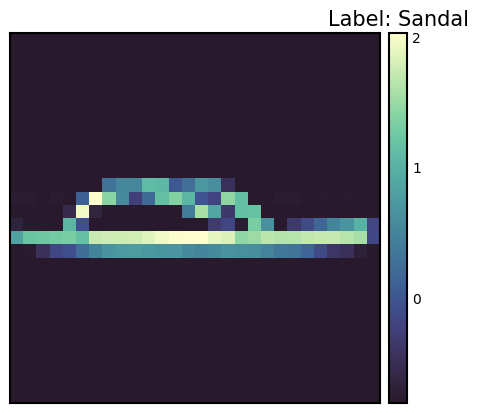

In [11]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Compose
import seaborn_image as isns
import matplotlib.pyplot as plt # Added for visualization


# Function to calculate mean and std of the dataset
def calculate_mean_std(dataset):
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False)
    data, _ = next(iter(dataloader))
    mean = data.mean(axis=(0, 2, 3))  # Calculate mean across channel dimension
    std = data.std(axis=(0, 2, 3))    # Calculate std across channel dimension
    return mean, std


# Datasets.  Note:  We *don't* apply Normalize here yet.
train_dataset = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=ToTensor()
)
test_dataset = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=ToTensor()
)

# Calculate mean and std for normalization
train_mean, train_std = calculate_mean_std(train_dataset)
print(f"Train data mean: {train_mean}, std: {train_std}")

# Now define transforms *with* normalization
transform = Compose([
    ToTensor(),
    Normalize(train_mean, train_std)  # Use calculated mean and std
])

# Re-create datasets with the normalization transform
train_dataset = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transform
)
test_dataset = datasets.FashionMNIST(
    root="data", train=False, download=True, transform=transform
)


# Check one training data sample.
sample_idx = torch.randint(len(train_dataset), size=(1,)).item()
img, label = train_dataset[sample_idx]  # Use a random index

print(f"Label: {label}")

# Manually create a label map
labels_map = {
    0: "T-shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

print(f"Label map: {labels_map[label]}")

# Plot using seaborn-image.
isns.imgplot(img.squeeze())  # Squeeze to remove channel dimension for grayscale
plt.title(f"Label: {labels_map[label]}") # Add title to plot
plt.show()


# Define data loaders
train_dataloader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_dataset, batch_size=32, shuffle=False) # No need to shuffle test data


### 3.1.5 Transformación de datos (Transform)

La transformación de datos es un proceso de preprocesamiento muy importante en el aprendizaje profundo. Desde el éxito de AlexNet en 2012, la ampliación de datos (Data Augmentation) se ha convertido en un factor clave para mejorar el rendimiento del modelo. PyTorch proporciona una variedad de herramientas para estos tipos de transformaciones. `transforms.Compose` permite aplicar varias transformaciones secuencialmente. Además, con la función `Lambda`, es fácil implementar transformaciones personalizadas.

La transformación de datos es muy importante para mejorar el rendimiento de generalización del modelo. En particular, en el campo de la visión por computadora, la ampliación de datos a través de diversas transformaciones se ha convertido en una práctica estándar. El caso de la transformación `Normalize` es un paso esencial para estabilizar el entrenamiento del modelo, ya que estandariza los datos.

Para aplicar la transformación `Normalize`, es necesario conocer la media (mean) y la desviación estándar (standard deviation) del conjunto de datos. El código para calcular esto es el siguiente.

In [12]:
from torchvision import transforms
import PIL
import torch
from torch.utils.data import DataLoader
from torchvision import datasets

# Calculate mean and std of the dataset
def calculate_mean_std(dataset):
    dataloader = DataLoader(dataset, batch_size=len(dataset), shuffle=False) # Load all data at once
    data, _ = next(iter(dataloader))
    # For grayscale images, calculate mean and std over height, width dimensions (0, 2, 3)
    # For RGB images, the calculation would be over (0, 1, 2)
    mean = data.mean(dim=(0, 2, 3))  # Calculate mean across batch and spatial dimensions
    std = data.std(dim=(0, 2, 3))    # Calculate std across batch and spatial dimensions
    return mean, std

# --- Example usage with FashionMNIST ---
# 1.  Create dataset *without* normalization first:
train_dataset_for_calc = datasets.FashionMNIST(
    root="data", train=True, download=True, transform=transforms.ToTensor()  # Only ToTensor
)

# 2. Calculate mean and std:
train_mean, train_std = calculate_mean_std(train_dataset_for_calc)
print(f"Train data mean: {train_mean}, std: {train_std}")


# 3.  *Now* create the dataset with normalization:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(train_mean, train_std)  # Use calculated mean and std
])

# Example of defining a custom transform using Lambda
def crop_image(image: PIL.Image.Image) -> PIL.Image.Image:
    # Original image is assumed to be 28x28.
    left, top, width, height = 5, 5, 18, 18 # Example crop parameters
    return transforms.functional.crop(image, top=top, left=left, width=width, height=height)

# Compose transforms, including the custom one and normalization.
transform_with_crop = transforms.Compose([
    transforms.Lambda(crop_image), # Custom cropping
    transforms.ColorJitter(),
    transforms.RandomInvert(),
    transforms.ToTensor(), # Must be *before* Normalize
    transforms.Normalize(train_mean, train_std) # Use calculated mean and std
])

train_dataset_transformed = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform_with_crop)
# Get one sample to check the transformation.
sample_img, sample_label = train_dataset_transformed[0]
print(f"Transformed image shape: {sample_img.shape}")
print(f"Transformed image min/max: {sample_img.min()}, {sample_img.max()}") # Check normalization

Train data mean: tensor([0.2860]), std: tensor([0.3530])
Transformed image shape: torch.Size([1, 18, 18])
Transformed image min/max: -0.8102576732635498, 2.022408962249756


En el código se genera primero un conjunto de datos al que solo se le aplica la transformación `ToTensor()` para calcular la media y la desviación estándar. Luego, utilizando los valores calculados, se define la transformación final que incluye la normalización `Normalize`. También se incluye un ejemplo de cómo añadir una función personalizada `crop_image` a la cadena de transformaciones usando una función `Lambda`. `ToTensor()` debe aplicarse *antes* de `Normalize`. `ToTensor()` convierte imágenes en el rango \[0, 255] a tensores en el rango \[0, 1], y `Normalize` normaliza estos datos en el rango \[0, 1] para que tengan una media de 0 y una desviación estándar de 1. Es común aplicar el aumento de datos solo a los datos de entrenamiento y no a los datos de validación/prueba.

### 3.1.6 Modelo

La implementación de modelos de redes neuronales ha evolucionado de diversas maneras desde la década de 1980. PyTorch adoptó un enfoque de implementación orientada a objetos desde su lanzamiento en 2016, lo cual se logra a través de `nn.Module`. Este enfoque mejoró significativamente la reutilización y escalabilidad de los modelos.

Las clases de modelo se implementan heredando de `nn.Module` y generalmente incluyen los siguientes métodos:

*   `__init__()`: define e inicializa los componentes del red neuronal (capas, funciones de activación, etc.).
*   `forward()`: recibe datos de entrada, realiza la operación de propagación hacia adelante del modelo y devuelve la salida (logits o predicciones).
*   (opcional) `training_step()`, `validation_step()`, `test_step()`: cuando se utilizan con bibliotecas como PyTorch Lightning, definen el comportamiento en cada paso de entrenamiento/validación/prueba.
*   (opcional) otros métodos definidos por el usuario: se pueden agregar métodos adicionales para realizar funciones específicas del modelo.

In [13]:
from torch import nn

class SimpleNetwork(nn.Module):
    def __init__(self):
        super().__init__()  # Or super(SimpleNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.network_stack = nn.Sequential(
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )

    def forward(self, x):
        x = self.flatten(x)  # Flatten the image data into a 1D array
        logits = self.network_stack(x)
        return logits

# Move model to the appropriate device (CPU or GPU)
model = SimpleNetwork().to(device)
print(model)

SimpleNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (network_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


La función logit tiene varios significados.

*   Significado matemático: es una función que convierte probabilidades en el rango \[0, 1] a números reales en el rango \[−∞, ∞].
*   Significado en aprendizaje profundo: es la salida cruda (sin normalizar) de una red neuronal.

En problemas de clasificación multiclase, comúnmente se aplica la función `softmax` al final para convertir los valores a probabilidades que se puedan comparar con las etiquetas. En este caso, el logit es la entrada de la función `softmax`.

Se crea un modelo a partir de una clase y se transfiere a un `device`. Si existe una GPU, el modelo se carga en la memoria de la GPU.

In [14]:
x = torch.rand(1, 28, 28, device=device)
logits = model(x)  # Don't call forward() directly!  Call the *model* object.
prediction = nn.Softmax(dim=1)(logits)  # Convert logits to probabilities
y_label = prediction.argmax(1) # Get the predicted class

print(f"Logits: {logits}")
print(f"Prediction probabilities: {prediction}")
print(f"Predicted class: {y_label}")

Logits: tensor([[ 0.0464, -0.0368,  0.0447, -0.0640, -0.0253,  0.0242,  0.0378, -0.1139,
          0.0005,  0.0299]], device='cuda:0', grad_fn=<AddmmBackward0>)
Prediction probabilities: tensor([[0.1052, 0.0968, 0.1050, 0.0942, 0.0979, 0.1029, 0.1043, 0.0896, 0.1005,
         0.1035]], device='cuda:0', grad_fn=<SoftmaxBackward0>)
Predicted class: tensor([0], device='cuda:0')


Es importante tener en cuenta que no se debe llamar directamente al método `forward()` del modelo. En su lugar, cuando se llama al objeto de modelo como una función (`model(x)`), `forward()` se ejecuta automáticamente y se integra con el sistema de diferenciación automática de PyTorch. El método `__call__` del objeto de modelo invoca a `forward()` y realiza tareas adicionales necesarias (como hooks).

### 3.1.7 Entrenamiento

> **Desafío**: ¿Cómo se pueden entrenar eficientemente modelos complejos con conjuntos de datos a gran escala?
>
> **Angustia del investigador**: El rendimiento de los modelos de aprendizaje profundo se ve fuertemente influenciado por la cantidad y calidad de los datos, así como por la complejidad del modelo. Sin embargo, entrenar modelos con conjuntos de datos a gran escala requería mucho tiempo y recursos de computación. Estabilizar el proceso de entrenamiento, prevenir el sobreajuste y encontrar los hiperparámetros óptimos eran problemas difíciles. Para abordar estos desafíos, se necesitaban algoritmos de aprendizaje eficientes, técnicas de optimización y bucles de entrenamiento automatizados.

Una vez que se han preparado los datos y el modelo para el entrenamiento, se realiza el entrenamiento práctico. Para convertir una red neuronal en un buen aproximador (approximator), es necesario actualizar iterativamente sus parámetros. Se define una función de error (loss function) que calcula la diferencia entre las etiquetas y las predicciones, y se selecciona un optimizador para actualizar continuamente los parámetros y reducir el error.

El proceso de entrenamiento sigue estos pasos:

1. Inicialización del conjunto de datos y del cargador de datos (data loader)
2. Carga de datos por lotes
3. Cálculo de las predicciones a través de la propagación hacia adelante
4. Cálculo del error a través de la función de pérdida
5. Cálculo de los gradientes a través de la retropropagación
6. Actualización de los parámetros a través del optimizador

Se llama época (epoch) a una iteración completa sobre todo el conjunto de datos, y este proceso se repite durante varias épocas en lo que se conoce como bucle de entrenamiento.

##### Hiperparámetros
El entrenamiento requiere tres hiperparámetros clave:

- Número de épocas (epoch): Determina cuántas veces se repetirá la época. Generalmente es mejor detenerse justo antes del sobreajuste.
- Tamaño del lote: El número de datos de entrenamiento que pasarán a través del modelo en una sola vez. Pasar todo el conjunto de datos puede ser irrealista debido a las limitaciones de memoria de GPU y el aumento exponencial del tiempo de cálculo matricial. Se actualizan gradualmente los parámetros del modelo con subconjuntos de datos para aproximar el valor óptimo. Si el tamaño del lote es demasiado pequeño, las variaciones pueden ser demasiado volátiles y dificultar la aproximación al mínimo.
- Tasa de aprendizaje: Ajusta la escala de los valores a actualizar. Puede compararse con el tamaño de paso en un proceso de búsqueda gradual. Generalmente tiene un valor pequeño. En el siguiente capítulo, se explorará la relación entre la tasa de aprendizaje y el optimizador.

In [15]:
# 3가지 초매개변수
epochs = 10
batch_size = 32
learning_rate = 1e-3 # 최적화기를 위해 앞서 지정했음.

##### Bucle de Entrenamiento

El bucle de entrenamiento se lleva a cabo en dos etapas por cada época.
1. Etapa de entrenamiento: optimización de parámetros
2. Etapa de validación: evaluación del rendimiento

Desde la introducción de la normalización por lotes en 2015, ha sido importante distinguir entre los modos train() y eval(). En el modo eval(), las operaciones de entrenamiento específicas como la normalización por lotes o el dropout se desactivan para mejorar la velocidad de inferencia.

##### Función de Pérdida

La función de pérdida es un elemento crucial en el aprendizaje de redes neuronales. Desde el modelo de neurona de McCulloch-Pitts en 1943, se han propuesto diversas funciones de pérdida. En particular, la introducción del cross-entropy (entropía cruzada) a partir de la teoría de la información en 1989 marcó un punto de inflexión importante en el desarrollo del aprendizaje profundo.

##### Binary Cross-Entropy (BCE)

El BCE, que se utiliza principalmente en clasificación binaria, está definido como sigue:

$$\mathcal{L} = - \sum_{i} [y_i \log{x_i} + (1-y_i)\log{(1-x_i)}] $$

Aquí, $y$ es la etiqueta real y $x$ es el valor predicho por el modelo, ambos con un rango de [0, 1].

PyTorch proporciona varias funciones de pérdida.

*   `nn.MSELoss`: para problemas de regresión (Error Cuadrático Medio)
*   `nn.NLLLoss`: logaritmo negativo de la verosimilitud
*   `nn.CrossEntropyLoss`: combinación de `LogSoftmax` y `NLLLoss`
*   `nn.BCEWithLogitsLoss`: integración de una capa sigmoide y BCE para mayor estabilidad numérica

En particular, `nn.BCEWithLogitsLoss` es notable por integrar una capa sigmoide y BCE para mayor estabilidad numérica. El uso de la función log tiene las siguientes ventajas (descritas con más detalle en el Capítulo 2):

1.  Mitiga cambios bruscos en los valores numéricos
2.  Convierte multiplicaciones en sumas, mejorando la eficiencia computacional

In [16]:
# Initialize the loss function
loss_fn = nn.CrossEntropyLoss()

##### Optimizador

Los algoritmos de optimización comenzaron con el método de descenso del gradiente (Gradient Descent) básico de la década de 1950 y lograron un gran avance con la aparición de Adam en 2014. `torch.optim` proporciona varios optimizadores, y actualmente Adam y AdamW son los más utilizados.

In [17]:
# Declare the optimizer.
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Learning rate scheduler (optional, but often beneficial)
scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=30, gamma=0.1)

En el código anterior, se agregó un programador de tasa de aprendizaje utilizando `torch.optim.lr_scheduler.StepLR`. Reduce la tasa de aprendizaje multiplicándola por `gamma` cada `step_size` épocas. La programación de la tasa de aprendizaje puede tener un gran impacto en la velocidad y estabilidad del entrenamiento.

##### Bucle de Entrenamiento (Training Loop)

Vamos a configurar un bucle de entrenamiento que se ejecuta iterativamente sobre el conjunto de datos. Un epoch generalmente consta de dos partes: entrenamiento y validación.

1.  **Bucle de Entrenamiento**: Optimizamos los parámetros utilizando el conjunto de datos de entrenamiento.
2.  **Bucle de Validación**: Verificamos cómo cambia el rendimiento del modelo utilizando el conjunto de datos de prueba (validación).

Durante el entrenamiento, se puede configurar el modo del modelo en `train` y `eval`. Esto se puede considerar como un tipo de interruptor. La distinción entre los modos `train()` y `eval()` se volvió importante con la introducción de la normalización por lotes en 2015. En el modo `eval()`, se desactivan operaciones de entrenamiento específicas como la normalización por lotes o el dropout para mejorar la velocidad de inferencia.

In [18]:
from torch.utils.tensorboard import SummaryWriter

# TensorBoard writer setup
writer = SummaryWriter('runs/fashion_mnist_experiment_1')


def train_loop(model, data_loader, loss_fn, optimizer, epoch):  # Added epoch for logging

    model.train()  # Set the model to training mode

    size = len(data_loader.dataset)  # Total number of data samples
    num_batches = len(data_loader)
    total_loss = 0

    for batch_count, (input_data, label_data) in enumerate(data_loader):
        # Move data to the GPU (if available).
        input_data = input_data.to(device)
        label_data = label_data.to(device)

        # Compute predictions
        preds = model(input_data)

        # Compute loss
        loss = loss_fn(preds, label_data)
        total_loss += loss.item()

        # Backpropagation
        loss.backward()  # Perform backpropagation

        # Update parameters
        optimizer.step()
        optimizer.zero_grad()  # Zero the gradients before next iteration

        if batch_count % 100 == 0:
            loss, current = loss.item(), batch_count * batch_size + len(input_data)
            # print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    avg_train_loss = total_loss / num_batches
    return avg_train_loss


def eval_loop(model, data_loader, loss_fn):
    model.eval()  # Set the model to evaluation mode

    correct, test_loss = 0.0, 0.0

    size = len(data_loader.dataset)  # Total data size
    num_batches = len(data_loader)  # Number of batches

    with torch.no_grad():  # Disable gradient calculation within this block
        for input_data, label_data in data_loader:  # No need for enumerate as count is not used
            # Move data to GPU (if available).
            input_data = input_data.to(device)
            label_data = label_data.to(device)

            # Compute predictions
            preds = model(input_data)

            test_loss += loss_fn(preds, label_data).item()
            correct += (preds.argmax(1) == label_data).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size

    # print(f"\n Test Result \n Accuracy: {(100 * correct):>0.1f}%, Average loss: {test_loss:>8f} \n")
    return test_loss, correct

##### Proceso de entrenamiento completo

El proceso de entrenamiento completo repite el entrenamiento y la validación en cada época. Se usa `tqdm` para mostrar visualmente el progreso, y TensorBoard para registrar los cambios en la tasa de aprendizaje.

In [19]:
# Progress bar utility
from tqdm.notebook import tqdm

epochs = 5  # Reduced for demonstration
for epoch in tqdm(range(epochs)):
    print(f"Epoch {epoch+1}\n-------------------------------")
    train_loss = train_loop(model, train_dataloader, loss_fn, optimizer, epoch)
    test_loss, correct = eval_loop(model, test_dataloader, loss_fn)

    # Log training and validation metrics to TensorBoard
    writer.add_scalar('Loss/train', train_loss, epoch)
    writer.add_scalar('Loss/test', test_loss, epoch)
    writer.add_scalar('Accuracy/test', correct, epoch)
    writer.add_scalar('Learning Rate', optimizer.param_groups[0]['lr'], epoch) # Log learning rate

    print(f'Epoch: {epoch}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {correct:.2f}%, LR: {optimizer.param_groups[0]["lr"]:.6f}')
    scheduler.step()  # Update learning rate.  Place *after* logging.

print("Done!")
writer.close() # Close TensorBoard Writer

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch 1
-------------------------------
Epoch: 0, Train Loss: 1.5232, Test Loss: 0.9543, Test Accuracy: 0.71%, LR: 0.001000
Epoch 2
-------------------------------
Epoch: 1, Train Loss: 0.7920, Test Loss: 0.7059, Test Accuracy: 0.76%, LR: 0.001000
Epoch 3
-------------------------------
Epoch: 2, Train Loss: 0.6442, Test Loss: 0.6208, Test Accuracy: 0.78%, LR: 0.001000
Epoch 4
-------------------------------
Epoch: 3, Train Loss: 0.5790, Test Loss: 0.5757, Test Accuracy: 0.79%, LR: 0.001000
Epoch 5
-------------------------------
Epoch: 4, Train Loss: 0.5383, Test Loss: 0.5440, Test Accuracy: 0.80%, LR: 0.001000
Done!


Este ciclo de entrenamiento-validación se ha establecido como una práctica estándar en el entrenamiento de deep learning desde la década de 1990. En particular, la etapa de validación desempeña un papel crucial en el monitoreo del sobreajuste y en la determinación del early stopping.

### 3.1.8 Guardado y lectura de modelos

El guardado de modelos es una parte muy importante en la práctica del aprendizaje profundo. Se pueden guardar los modelos entrenados para cargarlos nuevamente más tarde y reutilizarlos, o para desplegarlos en diferentes entornos (por ejemplo, servidores, dispositivos móviles). PyTorch proporciona dos métodos principales de guardado.

##### Guardar solo pesos

Los parámetros aprendidos del modelo (pesos y sesgos) se almacenan en un diccionario Python llamado `state_dict`. El `state_dict` es una estructura que asigna cada capa (layer) a los tensores de parámetros correspondientes. Este método tiene la ventaja de que permite cargar pesos incluso si la estructura del modelo cambia, por lo que generalmente se recomienda.

In [37]:
# Save model weights
torch.save(model.state_dict(), 'model_weights.pth')

# Load weights
model_saved_weights = SimpleNetwork()  # Create an empty model with the same architecture
model_saved_weights.load_state_dict(torch.load('model_weights.pth'))
model_saved_weights.to(device) # Don't forget to move to the correct device!
model_saved_weights.eval() # Set to evaluation mode

# Check performance (assuming eval_loop is defined)
eval_loop(model_saved_weights, test_dataloader, loss_fn)

/tmp/ipykernel_112013/3522135054.py:6: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_saved_weights.load_state_dict(torch.load('model_weights.pth'))


(0.5459668265935331, 0.8036)

##### Guardar el modelo completo

Después de 2018, a medida que las arquitecturas de modelos se han vuelto más complejas, también se ha adoptado la práctica de guardar tanto la estructura del modelo como sus pesos.

In [38]:
torch.save(model, 'model_trained.pth')

# Load the entire model
model_saved = torch.load('model_trained.pth')
model_saved.to(device)  # Move the loaded model to the correct device.
model_saved.eval() #  Set the loaded model to evaluation mode

# Check performance
eval_loop(model_saved, test_dataloader, loss_fn)

/tmp/ipykernel_112013/3185686172.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model_saved = torch.load('model_trained.pth')


(0.5459668265935331, 0.8036)

El método de guardar el modelo completo es conveniente, pero si la definición de la clase del modelo cambia, pueden surgir problemas de compatibilidad. En particular, en entornos de producción, la arquitectura del modelo no suele cambiar con frecuencia, por lo que guardar solo los pesos puede ser más estable. Además, el método de guardar el modelo completo utiliza el módulo `pickle` de Python, y `pickle` tiene una vulnerabilidad que permite ejecutar código arbitrario, lo cual puede ser un riesgo de seguridad.

##### Safetensors: Una alternativa más segura

Recientemente, se han desarrollado nuevos formatos de almacenamiento como `safetensors`, que mejoran la seguridad y la velocidad de carga en comparación con `pickle`. `safetensors` es un formato diseñado para almacenar datos de tensores de manera segura y eficiente.

*   **Seguridad:** `safetensors` no permite ejecutar código arbitrario, por lo que es mucho más seguro que `pickle`.
*   **Zero-copy:** los datos se mapean directamente en memoria sin necesidad de copiarlos, lo que hace que la carga sea rápida.
*   **Carga perezosa:** solo se cargan las partes necesarias, lo que reduce el uso de memoria.
*  **Soporte para múltiples frameworks**: PyTorch, TensorFlow, JAX, etc.

In [39]:
# Install safetensors: pip install safetensors

from safetensors.torch import save_file, load_file

# Save using safetensors
state_dict = model.state_dict()
save_file(state_dict, "model_weights.safetensors")

# Load using safetensors
loaded_state_dict = load_file("model_weights.safetensors", device=device) # Load directly to the device.
model_new = SimpleNetwork().to(device) # Create an instance of your model class
model_new.load_state_dict(loaded_state_dict)
model_new.eval()

# Check performance
eval_loop(model_new, test_dataloader, loss_fn)


(0.5459668265935331, 0.8036)

## 3.2 TensorBoard 

TensorBoard es una herramienta que registra, rastrea y visualiza de manera eficiente los diversos registros generados durante el entrenamiento de aprendizaje profundo. Es un tipo de herramienta de registro y visualización de datos de registro comúnmente conocida como tablero de instrumentos. Aunque se desarrolló originalmente para TensorFlow, ahora está integrado con PyTorch. Existen otras herramientas de visualización en formato de panel similar a TensorBoard, como las siguientes:

- Weights & Biases (WandB): una plataforma integral de MLOps basada en la nube que ofrece un amplio rango de funciones, incluyendo seguimiento de experimentos, gestión de versiones de conjuntos de datos y administración de modelos. Se destaca por su funcionalidad de colaboración en equipo y es ampliamente utilizada en entornos empresariales.
- Vertex AI: una herramienta de ML completamente administrada de Google Cloud que proporciona integración nativa con BigQuery, Dataproc y Spark. Permite construir, implementar y escalar modelos rápidamente, lo que la hace adecuada para flujos de trabajo de ML a gran escala.
- MLflow: una herramienta de código abierto que ofrece seguimiento de experimentos, empaquetado de modelos y un registro centralizado. Simplifica el seguimiento e implementación de modelos de ML y es ampliamente utilizada en los campos de ciencia de datos y aprendizaje automático.

Además de estas tres herramientas, existen muchas otras. En este contexto, nos enfocaremos principalmente en TensorBoard.

### 3.2.1 Uso básico de TensorBoard

TensorBoard apareció junto con TensorFlow en 2015. En ese momento, la complejidad de los modelos de aprendizaje profundo aumentó significativamente, lo que hizo evidente la necesidad de monitorear eficazmente el proceso de entrenamiento.

Las funciones principales de TensorBoard son las siguientes:
1. Rastreo de métricas escalares: registro de valores como la pérdida y la precisión.
2. Visualización de estructuras de modelo: representación gráfica del grafo de cálculo.
3. Rastreo de distribuciones: observación de cambios en las distribuciones de pesos y gradientes.
4. Proyección de incrustaciones: visualización 2D/3D de vectores de alta dimensión.
5. Optimización de hiperparámetros: comparación de resultados experimentales con diferentes configuraciones.

TensorBoard es una poderosa herramienta para visualizar y analizar el proceso de entrenamiento de aprendizaje profundo. El uso básico de TensorBoard consta principalmente de tres etapas: instalación, configuración del directorio de logs y configuración de callbacks.

##### Métodos de instalación

TensorBoard se puede instalar mediante pip o conda.

In [ ]:
!pip install tensorboard
# 또는
!conda install -c conda-forge tensorboard

##### Configuración del directorio de registro

TensorBoard lee los archivos de eventos almacenados en el directorio de registro para visualizarlos. En Jupyter Notebook o Colab, se configura de la siguiente manera.

In [41]:
from torch.utils.tensorboard import SummaryWriter

# 로그 디렉토리 설정
log_dir = 'logs/experiment_1'
writer = SummaryWriter(log_dir)

##### Ejecución de TensorBoard

TensorBoard se puede ejecutar de las siguientes dos maneras.

1. Desde la línea de comandos

In [ ]:
tensorboard --logdir=logs

2. ejecutar en Jupyter Notebook

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=logs

Ejecución posterior, puede acceder al panel de TensorBoard en su navegador web ingresando http://localhost:6006.

##### Ejecución en un servidor remoto

Cuando se ejecuta TensorBoard en un servidor remoto, use el túnel SSH.

In [ ]:
ssh -L 6006:127.0.0.1:6006 username@server_ip

**Parámetros principales (SummaryWriter)**

`SummaryWriter` es la clase principal que genera datos para registrar en TensorBoard. Los parámetros principales son los siguientes:

*   `log_dir`: ruta del directorio donde se guardarán los archivos de registro.
*   `comment`: cadena a agregar al final de `log_dir`.
*   `flush_secs`: frecuencia con la que se escriben los registros en el disco (en segundos).
*   `max_queue`: número de eventos/pasos pendientes que se pueden almacenar.

**Métodos principales (SummaryWriter)**

*   `add_scalar(tag, scalar_value, global_step=None)`: registra un valor escalar (por ejemplo, pérdida, precisión).
*   `add_histogram(tag, values, global_step=None, bins='tensorflow')`: registra un histograma (distribución de valores).
*   `add_image(tag, img_tensor, global_step=None, dataformats='CHW')`: registra una imagen.
*   `add_figure(tag, figure, global_step=None, close=True)`: registra una figura de Matplotlib.
*   `add_video(tag, vid_tensor, global_step=None, fps=4, dataformats='NCHW')`: registra un video.
*   `add_audio(tag, snd_tensor, global_step=None, sample_rate=44100)`: registra audio.
*   `add_text(tag, text_string, global_step=None)`: registra texto.
*   `add_graph(model, input_to_model=None, verbose=False)`: registra un gráfico de modelo.
*   `add_embedding(mat, metadata=None, label_img=None, global_step=None, tag='default', metadata_header=None)`: registra un proyector de incrustaciones (embeddings).
*   `add_hparams(hparam_dict, metric_dict, hparam_domain_discrete=None, run_name=None)`: registra hiperparámetros y sus métricas correspondientes.
*   `flush()`: registra todos los eventos pendientes en el disco.
*   `close()`: finaliza la grabación de registros y libera recursos.

**Parámetros principales del callback (TensorFlow/Keras)**

Cuando se usa TensorBoard con TensorFlow/Keras, se utiliza el callback `tf.keras.callbacks.TensorBoard`. Los parámetros principales son los siguientes:

*   `log_dir`: ubicación donde se guardan los registros.
*   `histogram_freq`: frecuencia de cálculo del histograma (0 significa que no se calculará). Se usa para visualizar la distribución de pesos, sesgos y valores de activación.
*   `write_graph`: indica si se debe visualizar el gráfico del modelo.
*   `write_images`: indica si se deben visualizar los pesos del modelo como imágenes.
*   `update_freq`: frecuencia con la que se registran las pérdidas y métricas ('batch', 'epoch' o un número entero).
*   `profile_batch`: rango de lotes a perfilar (por ejemplo, `profile_batch='5, 8'`). El perfilado es útil para identificar cuellos de botella en el rendimiento.
*   `embeddings_freq`: frecuencia con la que se visualizan las capas de incrustaciones.
*   `embeddings_metadata`: ruta del archivo de metadatos de incrustaciones.

### 3.2.2 Funciones de visualización principales de TensorBoard

TensorBoard puede visualizar diversas métricas que surgen durante el proceso de entrenamiento del modelo. Los paneles de visualización principales incluyen escalares, histogramas, distribuciones, gráficos y embeddings.

##### Visualización de métricas escalares
El panel de escalares visualiza cambios en métricas numéricas como valores de pérdida y precisión. Se pueden seguir diversas estadísticas del proceso de entrenamiento del modelo, como la tasa de aprendizaje, la norma del gradiente, el promedio/varianza de los pesos por capa. También se puede monitorear simultáneamente métricas de evaluación de calidad importantes en modelos generativos recientes, como la puntuación FID (Fréchet Inception Distance) o QICE (Quantile Interval Coverage Error). A través de estas métricas, se puede monitorear en tiempo real el progreso del entrenamiento del modelo y detectar problemas como el sobreajuste o la inestabilidad del entrenamiento en una etapa temprana. Se pueden registrar valores escalares de la siguiente manera.

In [ ]:
writer.add_scalar('Loss/train', train_loss, step)
writer.add_scalar('Accuracy/train', train_acc, step)
writer.add_scalar('Learning/learning_rate', current_lr, step)
writer.add_scalar('Gradients/norm', grad_norm, step)
writer.add_scalar('Quality/fid_score', fid_score, step)
writer.add_scalar('Metrics/qice', qice_value, step)

##### Histogramas y visualización de distribuciones
Puedes observar los cambios en la distribución de pesos y sesgos. Los histogramas muestran visualmente las distribuciones de pesos, sesgos, gradientes y valores de activación de cada capa, lo que ayuda a comprender el estado interno del modelo. En particular, pueden ayudarte a detectar temprano si los pesos se saturan en ciertos valores o si los gradientes desaparecen/explotan durante el proceso de aprendizaje, lo cual es muy útil para la depuración del modelo. Puedes registrar histogramas de la siguiente manera.

In [ ]:
for name, param in model.named_parameters():
    writer.add_histogram(f'Parameters/{name}', param.data, global_step)
    if param.grad is not None:
        writer.add_histogram(f'Gradients/{name}', param.grad, global_step)

##### Visualización de la estructura del modelo
Puede visualizar la estructura del modelo. En particular, puede comprender intuitivamente la estructura de capas y las conexiones de redes neuronales complejas. TensorBoard representa el flujo de datos, la forma de entrada y salida de cada capa, y el orden de operaciones en forma de gráfico, y permite examinar información detallada expandiendo cada nodo. Recientemente, ha sido especialmente útil para visualizar mecanismos de atención complejos como los de los modelos Transformer o Diffusion, capas de atención cruzada, estructuras de ramificación condicional, etc. Esto es muy útil para depurar y optimizar el modelo, y particularmente ayuda a comprender arquitecturas complejas con conexiones residuales o estructuras paralelas. Puede registrar el gráfico del modelo de la siguiente manera.

In [ ]:
writer.add_graph(model, input_to_model)

##### Visualización de incrustaciones
El Projector de TensorBoard permite proyectar incrustaciones de alta dimensión en espacios 2D o 3D para su visualización. Esto es útil para analizar las relaciones entre incrustaciones de palabras o vectores de características de imágenes. Se utiliza técnicas de reducción de dimensionalidad, como PCA o UMAP, para visualizar datos de alta dimensión complejos mientras se preservan la estructura de clústeres y las distancias relativas. En particular, UMAP permite una visualización rápida que conserva bien tanto la estructura local como la global. A través de esto, se puede verificar cómo los puntos de datos con características similares se agrupan, si se realiza una buena separación entre clases, y cómo cambia el espacio de características durante el proceso de aprendizaje. Se pueden registrar las incrustaciones de la siguiente manera.

In [ ]:
writer.add_embedding(
    features,
    metadata=labels,
    label_img=images,
    global_step=step
)


##### Visualización de hiperparámetros
Puede visualizar los resultados del ajuste de hiperparámetros. Además de la tasa de aprendizaje, el tamaño del lote y la tasa de dropout, también puede analizar el impacto de parámetros estructurales como el número de cabezas de atención en modelos Transformer, la longitud del prompt y la dimensión de los embeddings de tokens. Es posible visualizar junto con esto los parámetros de inferencia importantes en LLM modernos o modelos de difusión, como las programaciones de ruido, el número de pasos de muestreo y los pesos CFG (Classifier-Free Guidance). Se pueden representar el rendimiento del modelo según diferentes combinaciones de hiperparámetros mediante gráficos de coordenadas paralelas o diagramas de dispersión para ayudar a encontrar la configuración óptima. En particular, facilita comparar varios resultados experimentales a simple vista y analizar cómo las interacciones entre los hiperparámetros afectan el rendimiento del modelo. Puede registrar hiperparámetros y métricas relacionadas de la siguiente manera.

In [ ]:
writer.add_hparams(
    {
        'lr': learning_rate, 
        'batch_size': batch_size, 
        'num_heads': n_heads,
        'cfg_scale': guidance_scale,
        'sampling_steps': num_steps,
        'prompt_length': max_length
    },
    {
        'accuracy': accuracy, 
        'loss': final_loss,
        'fid_score': fid_score
    }
)

##### Visualización de imágenes
Se pueden visualizar las imágenes generadas durante el proceso de aprendizaje o los mapas de características intermedios. Al visualizar los filtros y mapas de activación de las capas convolucionales, se puede comprender intuitivamente qué características está aprendiendo el modelo y en qué partes de la imagen de entrada está prestando atención en cada capa. En particular, es muy útil para rastrear visualmente los cambios en la calidad de las imágenes generadas por modelos generativos modernos como Stable Diffusion o DALL-E. Con el surgimiento de modelos híbridos, se ha vuelto posible generar imágenes más sofisticadas y realistas. Se pueden registrar las imágenes de la siguiente manera.

In [ ]:
# 입력 이미지나 생성된 이미지 시각화
writer.add_images('Images/generated', generated_images, global_step)

# 디퓨전 모델의 중간 생성 과정 시각화
writer.add_images('Diffusion/steps', diffusion_steps, global_step)

# 어텐션 맵 시각화
writer.add_image('Attention/maps', attention_visualization, global_step)

A través de las funciones de visualización de TensorBoard, se puede comprender intuitivamente el proceso de aprendizaje del modelo y detectar rápidamente los problemas. En particular, al poder monitorear en tiempo real el progreso del aprendizaje, es útil para la detención temprana del proceso de aprendizaje o para ajustar los hiperparámetros. La visualización de incrustaciones es especialmente útil para comprender las relaciones de datos de alta dimensión y ayuda a analizar la estructura del espacio de características aprendido por el modelo.

### 3.2.3 Ejemplo de TensorBoard

En esta sección, examinaremos un ejemplo concreto de cómo aplicar las diversas funcionalidades de TensorBoard en el entrenamiento de un modelo de aprendizaje profundo real. Utilizaremos el conjunto de datos MNIST de dígitos manuscritos para entrenar un modelo CNN (Convolutional Neural Network) simple y explicaremos paso a paso cómo visualizar los indicadores y datos clave generados durante el proceso de entrenamiento mediante TensorBoard.

**Elementos de visualización clave:**

| Tipo de visualización | Contenido de la visualización                                                                                           | Pestaña de TensorBoard |
| :------------------- | :--------------------------------------------------------------------------------------------------- | :---------- |
| **Indicadores escalares**     | Pérdida de entrenamiento/prueba, precisión de entrenamiento/prueba, tasa de aprendizaje, norma del gradiente | SCALARS     |
| **Histogramas/distribuciones**   | Distribución de pesos en todas las capas, distribución de gradientes en todas las capas                          | DISTRIBUTIONS, HISTOGRAMS |
| **Estructura del modelo**       | Grafo computacional del modelo CNN MNIST                                                       | GRAPHS      |
| **Mapas de características**         | Mapas de características de la capa Conv1, mapas de características de la capa Conv2, cuadrícula de imágenes de entrada, visualización de filtros de Conv1                        | IMAGES      |
| **Embeddings**          | Vectores de características de 32 dimensiones de la capa FC1, visualización en 2D utilizando t-SNE, etiquetas de imágenes MNIST                            | PROJECTOR   |
| **Hiperparámetros**   | Tamaño del lote, tasa de aprendizaje, ratio de dropout, tipo de optimizador, Weight decay, Momentum, pasos/gamma del programador       | HPARAMS     |

**Frecuencia de visualización:**

*   Escalares/histogramas: cada 50 lotes(batch)
*   Mapas de características/imágenes: cada 50 lotes
*   Embeddings: al final de cada época(epoch)
*   Hiperparámetros: al inicio y final del entrenamiento

**Ejemplo de código**

En este ejemplo se utiliza el paquete `dld`. Se importan los módulos necesarios y se inicia el entrenamiento. La función `train()` entrena un modelo CNN en el conjunto de datos MNIST utilizando hiperparámetros predeterminados, y registra el proceso de entrenamiento en TensorBoard. Para experimentar con diferentes hiperparámetros, puede pasar el argumento `hparams_dict` a la función `train()`.

In [ ]:
# In a notebook cell:
from dldna.chapter_03.train import train

# Run with default hyperparameters
train()

# Run with custom hyperparameters
my_hparams = {
    'batch_size': 128,
    'learning_rate': 0.01,
    'epochs': 8,
}
train(hparams_dict=my_hparams, log_dir='runs/my_custom_run')

# Start TensorBoard (in a separate cell, or from the command line)
# %load_ext tensorboard
# %tensorboard --logdir runs

**Ejecución de TensorBoard:**

Una vez que el entrenamiento esté completo, use el siguiente comando en la shell para ejecutar TensorBoard.

In [ ]:

tensorboard --logdir runs

Puede ver el panel de TensorBoard conectándose a `http://localhost:6006` en su navegador web. 

Podrá confirmar que se han creado varias tarjetas para cada elemento.
![TensorBoard](../../../assets/images/03_01.png)

En cada elemento, puede verificar los cambios individuales de valores e imágenes.
![TensorBoard](../../../assets/images/03_02.png)


**Uso del panel de TensorBoard**

*   **Pestaña SCALARS:** rastrea los cambios en el tiempo de la pérdida de entrenamiento/prueba, precisión, tasa de aprendizaje, etc. Esto le permite determinar si el modelo está aprendiendo bien y si se produce un ajuste excesivo (overfitting).
*   **Pestaña GRAPHS:** visualiza el grafo de cálculo del modelo para mostrar la flujo de datos y los procesos de cálculo a simple vista. Ayuda a comprender la estructura de modelos complejos.
*   **Pestañas DISTRIBUTIONS/HISTOGRAMS:** visualiza la distribución de pesos y gradientes. Esto le permite diagnosticar si la inicialización de los pesos es adecuada y si se producen problemas de desvanecimiento o explosión de gradientes (vanishing or exploding gradients).
*   **Pestaña IMAGES:** visualiza las imágenes de entrada, mapas de características y filtros en formato de imagen. Esto le permite verificar de manera intuitiva qué partes de la imagen está observando el modelo y si la extracción de características es efectiva.
*   **Pestaña PROJECTOR:** proyecta incrustaciones de alta dimensión a 2D/3D para su visualización. Ayuda a identificar agrupamientos de datos y valores atípicos (outliers).
*   **Pestaña HPARAMS:** compara los resultados de experimentos realizados con diferentes combinaciones de hiperparámetros, ayudándole a encontrar la configuración óptima.

En este ejemplo, hemos explorado cómo usar TensorBoard para visualizar el proceso de entrenamiento de un modelo de deep learning. TensorBoard es más que una simple herramienta de visualización; es esencial para comprender el funcionamiento del modelo, diagnosticar problemas y mejorar su rendimiento.

## 3.3 Hugging Face Transformers

Hugging Face comenzó en 2016 como una aplicación de chatbot para adolescentes fundada por empresarios franceses. Inicialmente, su objetivo era proporcionar un amigo AI que ofreciera apoyo emocional y entretenimiento, pero experimentó un gran punto de inflexión al hacer público el modelo NLP de su chatbot de código abierto. Esto coincidió con un período en el que modelos de lenguaje de alto rendimiento como BERT y GPT estaban emergiendo, aunque era difícil utilizarlos en la práctica, lo que generó una gran resonancia. El lanzamiento de la biblioteca Transformers en 2019 revolucionó el campo del procesamiento de lenguaje natural. Si PyTorch proporciona las operaciones básicas y el marco de aprendizaje profundo, Hugging Face se centra en la implementación y uso práctico de los modelos de lenguaje. En particular, facilitaron la compartición y reutilización de modelos preentrenados, lo que permitió a cualquiera utilizar modelos de lenguaje a gran escala, que hasta entonces eran el dominio exclusivo de un puñado de grandes empresas.

Hugging Face ha construido un ecosistema abierto digno del título "GitHub del AI". Actualmente se comparten más de un millón de modelos y cientos de miles de conjuntos de datos, convirtiéndose en una plataforma que va más allá de un simple repositorio de código para fomentar el desarrollo ético y responsable de la IA. Especialmente, han implementado un sistema de tarjetas de modelo que detalla las limitaciones y sesgos de cada modelo, y un sistema de retroalimentación basado en la comunidad para verificar continuamente la calidad y la ética del modelo. Estos esfuerzos no solo han democratizado el desarrollo de IA, sino que también han establecido un nuevo paradigma de desarrollo tecnológico responsable. El enfoque de Hugging Face equilibra la innovación técnica con consideraciones éticas, convirtiéndose en un ejemplo a seguir en el desarrollo de AI moderno.

### 3.3.1 Introducción a la biblioteca Transformers

Transformers proporciona una interfaz integrada para descargar y usar modelos preentrenados fácilmente. Funciona sobre marcos como PyTorch o TensorFlow, lo que garantiza su compatibilidad con los ecosistemas de aprendizaje profundo existentes. En particular, también admite nuevos marcos como JAX, ampliando las opciones disponibles para los investigadores. Los componentes principales de Transformers son dos.

##### Modelo Hub y Pipelines

El Modelo Hub actúa como un repositorio central para modelos preentrenados. Se publican modelos especializados en diversas tareas de procesamiento de lenguaje natural, como generación de texto, clasificación, traducción, resumen y respuestas a preguntas. Cada modelo se proporciona con detallada metadatos, incluyendo métricas de rendimiento, información de licencia, origen de los datos de entrenamiento, etc. En particular, el sistema de tarjetas de modelo (Model Card) también especifica las limitaciones y sesgos del modelo para fomentar el desarrollo responsable de IA.

Las pipelines abstraen procesos complejos de preprocesamiento y postprocesamiento, proporcionándolos a través de una interfaz simple. Esto es especialmente útil en entornos de producción, reduciendo significativamente los costos de integración del modelo. Internamente, las pipelines configuran automáticamente el tokenizador y el modelo, y también realizan optimizaciones como procesamiento por lotes o aceleración GPU de manera automática.

In [ ]:
from transformers import pipeline

classifier = pipeline("sentiment-analysis")
result = classifier("I love this book!")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

Device set to use cuda:0


##### Tokenizador y clases de modelos

El tokenizador convierte el texto de entrada en una secuencia numérica que el modelo puede procesar. Cada modelo tiene un tokenizador dedicado, lo cual refleja las características de los datos de entrenamiento. El tokenizador no solo se limita a la división de palabras, sino que también maneja consistentemente preprocesamientos complejos como la tokenización subpalabra, la adición de tokens especiales, el relleno y la truncatura. En particular, integra varios algoritmos de tokenización, como WordPiece, BPE, SentencePiece, lo que permite seleccionar la mejor forma de tokenización adaptada a las características de cada idioma y dominio.

Las clases de modelos implementan las redes neuronales que realizan los cálculos reales. Se admite una variedad de arquitecturas como BERT, GPT, T5, y se puede seleccionar automáticamente la arquitectura del modelo a través de las clases de la serie AutoModel. Cada modelo viene con pesos pre-entrenados y puede ser ajustado para tareas específicas según sea necesario. Además, técnicas de optimización como la paralelización de modelos, cuantización y poda también pueden aplicarse inmediatamente.

In [43]:
from transformers import AutoTokenizer, AutoModel

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
model = AutoModel.from_pretrained("bert-base-uncased")

### 3.3.2 Casos de uso principales

La biblioteca Transformers se utiliza en una variedad de tareas de procesamiento de lenguaje natural. Desde el desarrollo de modelos de la serie GPT a partir de 2020, las capacidades de generación de texto han mejorado enormemente, y para 2024, con la aparición de modelos de código abierto de alto rendimiento como Llama 3, el alcance de uso se ha ampliado aún más. En particular, el modelo de 405B parámetros de Llama 3 muestra un rendimiento comparable al de GPT-4 y ha logrado avances significativos en el procesamiento multilingüe, codificación e inferencia. Este progreso ha permitido diversas aplicaciones en entornos empresariales reales, incluyendo soporte al cliente, generación de contenido, análisis de datos y procesamiento automatizado de tareas. En particular, la mejora significativa en la generación y depuración de código también ha contribuido a aumentar la productividad de los desarrolladores.

**Uso del Hugging Face Hub:**

El Hugging Face Hub ([https://huggingface.co/models](https://huggingface.co/models)) es una plataforma para buscar, filtrar y descargar numerosos modelos y conjuntos de datos.

*   **Búsqueda de modelos:**  Puede buscar por nombre de modelo (por ejemplo, "bert", "gpt2", "t5") o tarea (por ejemplo, "text-classification", "question-answering") en la barra de búsqueda de la esquina superior izquierda.
*   **Filtrado:**  Puede filtrar por Tarea, Biblioteca, Idioma, Conjunto de datos y otros criterios en el panel lateral izquierdo.
*   **Páginas de modelos:**  Cada página de modelo proporciona información útil como una descripción del modelo, ejemplos de uso, métricas de rendimiento y tarjetas de modelo.

**Generación y clasificación de texto**

La generación de texto es la tarea de crear texto natural basado en un prompt dado. Los modelos más recientes ofrecen las siguientes funciones avanzadas:
- Generación multimodal: creación de contenido que combina texto e imágenes
- Generación automática de código: escritura de código optimizado para diferentes lenguajes de programación
- Agentes conversacionales: implementación de chatbots inteligentes que comprenden el contexto
- Texto especializado: generación de documentos en dominios especializados como la medicina y el derecho

In [ ]:
from transformers import pipeline

# Text generation pipeline (using gpt2 model)
generator = pipeline('text-generation', model='gpt2')  # Smaller model
result = generator("Design a webpage that", max_length=50, num_return_sequences=1)
print(result[0]['generated_text'])


Device set to use cuda:0
Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.
Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


Design a webpage that is compatible with your browser with our FREE SEO Service.

You read that right. By utilizing a web browser's default settings, your webpage should be free from advertisements and other types of spam. The best way to avoid this


La clasificación de texto se habrá sofisticado aún más para 2025, ofreciendo las siguientes funciones:

- Aprendizaje por cero/uno: a través de la biblioteca Transformers de Hugging Face es posible una adaptación inmediata a nuevas categorías. En particular, los modelos de aprendizaje previo basados en inferencia de lenguaje natural pueden lograr una precisión superior al 90% con menos de 8 ejemplos y son aplicables a diversos dominios.
- Clasificación multilingüe: los modelos multilingües más recientes, como ModernBERT de Hugging Face, admiten más de 16 idiomas principales. Específicamente, el modelo base de 150M de parámetros logra una puntuación F1 superior al 80% y muestra un rendimiento excelente incluso en idiomas con recursos limitados.
- Clasificación jerárquica: el marco HiGen de Hugging Face proporciona funciones especializadas para la clasificación de etiquetas jerárquicas. A través de una función de pérdida basada en niveles, captura eficazmente las relaciones semánticas entre texto y etiquetas, mostrando un alto rendimiento incluso en clases con datos limitados.
- Clasificación en tiempo real: a través de las pipelines de Hugging Face es posible el procesamiento en tiempo real de datos de transmisión. Con tecnologías de optimización como Flash Attention integradas por defecto, se pueden manejar secuencias largas de manera eficiente y se ofrece un alto rendimiento en aplicaciones en tiempo real.

##### Ajuste fino y compartición de modelos

Hugging Face proporciona la última tecnología de ajuste fino para apoyar el aprendizaje eficiente de grandes modelos de lenguaje. Estas tecnologías permiten reducir significativamente los costos y tiempos de aprendizaje mientras mantienen el rendimiento del modelo.

- QLoRA (Quantized Low-Rank Adaptation): proporcionado a través de la biblioteca PEFT de Hugging Face, combina cuantización de 4 bits con adaptación de bajo rango para reducir el uso de memoria en más del 90%. En particular, es posible ajustar modelos de 65B parámetros en una GPU de 48GB.
- Spectrum: técnica de optimización selectiva por capa integrada con la biblioteca TRL de Hugging Face. Analiza la relación señal-ruido de cada capa y selecciona para el aprendizaje solo las capas más importantes, mejorando así la eficiencia computacional.
- Flash Attention: compatible por defecto desde la versión 2.2 de Transformers de Hugging Face y se puede activar fácilmente con el parámetro attn_implementation="flash_attention_2". En particular, mejora significativamente la eficiencia de memoria en el procesamiento de secuencias largas.
- DeepSpeed: totalmente integrado a través de la biblioteca Accelerate de Hugging Face y apoya eficientemente el aprendizaje distribuido a gran escala mediante el optimizador ZeRO. También es utilizable durante la inferencia, permitiendo cargar modelos grandes en múltiples GPUs.

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer, TrainingArguments, Trainer, DataCollatorWithPadding
from datasets import Dataset
import torch
import numpy as np

# --- 1. Load a pre-trained model and tokenizer ---
model_name = "distilbert-base-uncased"  # Use a small, fast model
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=2)  # Binary classification

# --- 2. Create a simple dataset (for demonstration) ---
raw_data = {
    "text": [
        "This is a positive example!",
        "This is a negative example.",
        "Another positive one.",
        "And a negative one."
    ],
    "label": [1, 0, 1, 0],  # 1 for positive, 0 for negative
}
dataset = Dataset.from_dict(raw_data)

# --- 3. Tokenize the dataset ---
def tokenize_function(examples):
    return tokenizer(examples["text"], truncation=True) #padding is handled by data collator

tokenized_dataset = dataset.map(tokenize_function, batched=True)
tokenized_dataset = tokenized_dataset.remove_columns(["text"]) # remove text, keep label

# --- 4. Data Collator (for dynamic padding) ---
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

# --- 5. Training Arguments ---
fp16_enabled = False
if torch.cuda.is_available():
    try:
        if torch.cuda.get_device_capability()[0] >= 7:
            fp16_enabled = True
    except:
        pass

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,          # Keep it short
    per_device_train_batch_size=2,  # Small batch size
    logging_steps=1,           # Log every step
    save_strategy="no",         # No saving
    report_to="none",          # No reporting
    fp16=fp16_enabled,  # Use fp16 if avail.
    # --- Optimization techniques (demonstration) ---
    # gradient_checkpointing=True,  # Enable gradient checkpointing (if needed for large models)
    # gradient_accumulation_steps=2, # Increase effective batch size
)


# --- 6. Trainer ---
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_dataset,
    # eval_dataset=...,  # Add an eval dataset if you have one
    data_collator=data_collator,  # Use the data collator
    # optimizers=(optimizer, scheduler) # you could also customize optimizer
)

# --- 7. Train ---
print("Starting training...")
trainer.train()
print("Training finished!")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Map:   0%|          | 0/4 [00:00<?, ? examples/s]

Starting training...


/home/sean/anaconda3/envs/DL/lib/python3.10/site-packages/torch/nn/parallel/_functions.py:71: UserWarning: Was asked to gather along dimension 0, but all input tensors were scalars; will instead unsqueeze and return a vector.
  warnings.warn(


Step,Training Loss
1,0.667500


Training finished!


El ecosistema de compartir modelos actualmente admite las siguientes características más recientes para 2025.
- Generación automática de tarjetas de modelo: el sistema automatizado de tarjetas de modelo de Hugging Face analiza y documenta automáticamente los indicadores de rendimiento y sesgo. En particular, se puede describir claramente las características y limitaciones del modelo en un formato estandarizado a través de la Herramienta de Tarjeta de Modelo.
- Control de versiones: el sistema de control de versiones basado en Git de Hugging Face Hub permite rastrear el historial de cambios y las variaciones de rendimiento del modelo. Se pueden registrar y comparar automáticamente los métricas de rendimiento y los cambios de parámetros para cada versión.
- Herramientas colaborativas: proporciona un entorno colaborativo integrado con Hugging Face Spaces. Los miembros del equipo pueden compartir en tiempo real el proceso de desarrollo, prueba y despliegue de modelos, intercambiar comentarios y también se admite la integración con pipelines CI/CD.
- IA ética: a través del marco de IA ética de Hugging Face, se puede verificar y evaluar automáticamente el sesgo del modelo. En particular, se pueden analizar las diferencias en rendimiento entre diversos grupos demográficos y se pueden identificar riesgos potenciales con anticipación.

## Ejercicios de práctica

**1. Problemas básicos**

  * Explique las diferencias entre los tensores de PyTorch y los arrays de NumPy, y cómo convertir entre ellos.
  * Describa el papel de la capa `torch.nn.Linear` y cómo inicializar sus pesos.
  * Explique cómo funciona la diferenciación automática (automatic differentiation) en PyTorch y el rol de la propiedad `requires_grad`.

**2. Problemas aplicados**

  * Escriba un código para dividir un conjunto de datos dado en conjuntos de entrenamiento, validación y prueba utilizando `torch.utils.data.Dataset` y `torch.utils.data.DataLoader`, y cargue los datos por lotes.
  * Implemente un modelo de CNN simple (por ejemplo, LeNet-5) heredando de `nn.Module` y use `torchsummary` para verificar la estructura del modelo y el número de parámetros.
  * Entrene un modelo usando el conjunto de datos MNIST o Fashion-MNIST y visualice el proceso de entrenamiento (pérdida, precisión, etc.) utilizando TensorBoard.

**3. Problemas avanzados**

  * Implemente multiplicación de matrices, transposición, multiplicación de matrices por lotes, transformaciones bilineales, etc., usando `torch.einsum`. (Proporcione la notación de Einstein para cada operación y implemente el código en PyTorch.)
  * Escriba un código para crear un conjunto de datos personalizado y aplicar aumentación de datos (data augmentation) utilizando `torchvision.transforms` (por ejemplo, rotación de imágenes, recorte, transformaciones de color).
  * Explique cómo calcular derivadas de orden superior usando `torch.autograd.grad` y escriba un ejemplo de código simple. (Por ejemplo, el cálculo de la matriz Hessiana)
  * Explique por qué se puede llamar a un objeto de modelo como una función sin necesidad de invocar directamente el método `forward()` de `torch.nn.Module`. (Pista: considere la relación con el método `__call__` y el sistema de diferenciación automática)

::: {.callout-note collapse="true" title="Haga clic para ver el contenido (solución)"}
## Soluciones a los Ejercicios de Práctica

### 1. Soluciones a los Problemas Básicos

1.  **Tensor vs. Array NumPy:**
    *   **Diferencias:** El tensor admite aceleración GPU y diferenciación automática. NumPy es una operación de matriz genérica basada en CPU.
    *   **Conversión:** `torch.from_numpy()`, `.numpy()` (sin embargo, para tensores GPU se requiere `.cpu()` primero).

    ```python
    # Ejemplo
    import torch
    import numpy as np
    numpy_array = np.array([1, 2, 3])
    torch_tensor = torch.from_numpy(numpy_array)  # o torch.tensor()
    numpy_back = torch_tensor.cpu().numpy()
    ```
2.  **`nn.Linear`:**
    *   **Función:** `y = xW^T + b` (transformación lineal). Multiplica la entrada `x` por el peso `W` y suma el sesgo `b`.
    *   **Inicialización:** Por defecto, inicialización Kaiming He (distribución uniforme). Se puede cambiar usando el módulo `torch.nn.init`.

    ```python
    # Ejemplo
    import torch.nn as nn
    import torch.nn.init as init
    linear_layer = nn.Linear(in_features=10, out_features=5)
    init.xavier_uniform_(linear_layer.weight) # Inicialización Xavier
    ```

3.  **Diferenciación Automática (Autograd):**
    *   **Funcionamiento:** Cuando se realizan operaciones con tensores `requires_grad=True`, se crea un grafo de cálculo, y al llamar a `.backward()`, se calcula el gradiente mediante la regla de la cadena.
    *   **`requires_grad`:** Establece si se debe calcular y rastrear el gradiente.

    ```python
    # Ejemplo
    import torch
    x = torch.tensor([2.0], requires_grad=True)
    y = x**2 + 3*x + 1
    y.backward()
    print(x.grad)  # Salida: tensor([7.])
    ```

### 2. Soluciones a los Problemas de Aplicación

4.  **`Dataset`, `DataLoader`:**

    ```python
    from torch.utils.data import Dataset, DataLoader, random_split
    import torchvision.transforms as transforms
    from torchvision import datasets

    # Conjunto de Datos Personalizado (Ejemplo)
    class CustomDataset(Dataset):
        def __init__(self, data, targets, transform=None):
            self.data = data
            self.targets = targets
            self.transform = transform
        def __len__(self):
            return len(self.data)
        def __getitem__(self, idx):
            sample, label = self.data[idx], self.targets[idx]
            if self.transform:
                sample = self.transform(sample)
            return sample, label
    ```
# MNIST DataLoader ejemplo (utilizando torchvision)
transform = transforms.ToTensor() # datos de imagen a tensor
mnist_dataset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
train_size = int(0.8 * len(mnist_dataset))
val_size = len(mnist_dataset) - train_size
train_dataset, val_dataset = random_split(mnist_dataset, [train_size, val_size])
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32)

```

5.  **LeNet-5, `torchsummary`, tensorboard:** (código completo ver respuesta anterior, aquí solo la parte clave)

```python
import torch.nn as nn
import torch.nn.functional as F
from torchsummary import summary
from torch.utils.tensorboard import SummaryWriter

# Modelo LeNet-5
class LeNet5(nn.Module):
    def __init__(self):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 6, kernel_size=5, stride=1, padding=2)
        self.pool1 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5, stride=1)
        self.pool2 = nn.AvgPool2d(kernel_size=2, stride=2)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = F.relu(self.conv1(x))
        x = self.pool1(x)
        x = F.relu(self.conv2(x))
        x = self.pool2(x)
        x = x.view(x.size(0), -1)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

model = LeNet5()
summary(model, input_size=(1, 28, 28)) # resumen de la estructura del modelo

# ... (código de entrenamiento, ver respuesta anterior) ...

writer = SummaryWriter() # tensorboard
# ... (durante el entrenamiento usar writer.add_scalar() para registrar) ...
writer.close()
```

### 3. Solución a problemas avanzados

6.  **`torch.einsum`:**

```python
import torch

```
A = torch.randn(3, 4)
B = torch.randn(4, 5)
C = torch.einsum("ij,jk->ik", A, B)   # multiplicación de matrices
D = torch.einsum("ij->ji", A)        # transposición
E = torch.einsum("bi,bj,ijk->bk", A, B, torch.randn(2,3,4))  # transformación bilineal
```

7.  **Conjunto de datos personalizado, aumento de datos:**

```python
from torch.utils.data import Dataset
from torchvision import transforms
from PIL import Image
import os

class CustomImageDataset(Dataset): # herencia de Dataset
    def __init__(self, root_dir, transform=None):
        # ... (implementación del constructor) ...
        pass
    def __len__(self):
        # ... (devolver el número de datos) ...
        pass
    def __getitem__(self, idx):
        # ... (devolver la muestra correspondiente a idx) ...
        pass

# aumento de datos
transform = transforms.Compose([
    transforms.RandomResizedCrop(224),  # recorte aleatorio con tamaño y relación de aspecto
    transforms.RandomHorizontalFlip(),     # volteo horizontal aleatorio
    transforms.ToTensor(),              # conversión a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # normalización
])

# dataset = CustomImageDataset(root_dir='path/to/images', transform=transform)
```

8.  **Funciones de orden superior:**

```python
import torch

x = torch.tensor(2.0, requires_grad=True)
y = x**3

# derivada primera
first_derivative = torch.autograd.grad(y, x, create_graph=True)[0]  # create_graph=True
print(first_derivative)

# derivada segunda (hessiano)
second_derivative = torch.autograd.grad(first_derivative, x)[0]
print(second_derivative)
```

9. **Método `__call__`:**

El método `__call__` de `nn.Module` realiza tareas adicionales (como registrar hooks, configuraciones relacionadas con la diferenciación automática) *antes y después* de llamar a `forward()`. Si se llama directamente a `forward()`, estas funcionalidades pueden ser omitidas, lo que podría resultar en cálculos incorrectos de gradientes o en mal funcionamiento de otras características del modelo (por ejemplo, la configuración de la propiedad `training` de `nn.Module`). Por lo tanto, *siempre* debe llamarse al objeto de modelo como si fuera una función (`model(input)`).
:::

**Referencias**

1.  **Tutorial oficial de PyTorch:** [https://pytorch.org/tutorials/](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/tutorials/)
2.  **Deep Learning with PyTorch (Stevens, Antiga, Viehmann, 2020):** [https://pytorch.org/deep-learning-with-pytorch](https://www.google.com/search?q=https://pytorch.org/deep-learning-with-pytorch)
3.  **Programming PyTorch for Deep Learning (Delugach, 2023):** [https://www.oreilly.com/library/view/programming-pytorch-for/9781098142481/](https://www.google.com/search?q=https://www.oreilly.com/library/view/programming-pytorch-for/9781098142481/)
4.  **PyTorch Recipes (Kalyan, 2019):** [https://pytorch.org/tutorials/recipes/recipes\_index.html](https://www.google.com/url?sa=E&source=gmail&q=https://pytorch.org/tutorials/recipes/recipes_index.html)
5.  **Understanding the difficulty of training deep feedforward neural networks (Glorot & Bengio, 2010):** [http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf](http://proceedings.mlr.press/v9/glorot10a/glorot10a.pdf)
6.  **Biblioteca Fastai:** [https://docs.fast.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://docs.fast.ai/)
7.  **PyTorch Lightning:** [https://www.pytorchlightning.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://www.pytorchlightning.ai/)
8.  **Documentación de Hugging Face Transformers:** [https://huggingface.co/docs/transformers/index](https://www.google.com/url?sa=E&source=gmail&q=https://huggingface.co/docs/transformers/index)
9.  **Documentación de TensorBoard:** [https://www.tensorflow.org/tensorboard](https://www.google.com/url?sa=E&source=gmail&q=https://www.tensorflow.org/tensorboard)
10. **Documentación de Weights & Biases:** [https://docs.wandb.ai/](https://www.google.com/url?sa=E&source=gmail&q=https://docs.wandb.ai/)